In [1319]:
import ee 
import shapely as shp
import pandas as pd
import numpy as np
import geopandas as gpd
import ast
from shapely.geometry import Polygon, MultiPolygon, Point
import rasterio
import geopandas as gpd
import sys
#%load_ext autoreloadb
#%autoreload 2
sys.path.insert(1, '/Users/gr_1/Documents/simplem/')
import simplem_par as simplem
import matplotlib.pyplot as plt
import os
import geopandas as gpd
superscript = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
import seaborn as sns
from matplotlib.colors import ListedColormap
plt.rcParams.update({'font.size': 22})

In [1297]:
import numpy as np
## Figures
folder = 'results/v2_artificial_mn05_old/'
ns = np.load('{}/ns.npy'.format(folder),allow_pickle=True)
ms = np.load('{}/ms.npy'.format(folder),allow_pickle=True)
diffus = np.load('{}/diffu.npy'.format(folder),allow_pickle=True)
Gs = np.load('{}/Gs.npy'.format(folder),allow_pickle=True)
eros1 = np.load('{}/eros.npy'.format(folder),allow_pickle=True)
ks = np.load('{}/ks.npy'.format(folder),allow_pickle=True)
careas = np.load('{}/careas.npy'.format(folder),allow_pickle=True)
slps = np.load('{}/slps2.npy'.format(folder),allow_pickle=True)
#dns = np.load('{}/dns.npy'.format(folder),allow_pickle=True)

In [1298]:
a = gpd.read_file('/Users/gr_1/Documents/cosmo_predict/octopus_v2')
oldid = a.index
outliers = np.where((a['EBE_MMKYR']/1000<1.51e-3) & (a['EBE_MMKYR'] > 0))[0]

#np.load('outliers.npy')
#a.index = range(len(a))
#a['log(residual (m/Myr))'] = np.log10(a['ebe_mmkyr']/1000) - np.log10(dfs[np.argsort(r2s)[-1]][:len(a)])
#a['ebe_mmkyr'][np.abs(a['log(residual (m/Myr))'].to_numpy()) > 2] = np.nan  #Maybe we want to remove the big outliers (pedro?)

## Begin duplicate analysis

In [1299]:
c = a.centroid
cb = a.centroid.buffer(.01)
ca = a.area
is2 = [np.where(cb.contains(c.iloc[i])) for i in range(len(a))]
is1 = []
j2=0
for j in a.index:
    
    is1.append([])
    for i in range(len(is2[j2])):
        #print((np.abs(ca[j] - ca[is2[j][i]]) / ca[is2[j][i]] < .05))
        if (np.abs(ca[j] - ca[is2[j][i]]) / ca[is2[j][i]] < .05).to_numpy()[ 0 ]: # Less than 5 % change
            print(np.abs(ca[j] - ca[is2[j][i]]) / ca[is2[j][i]])
            is1[ j2 ].append(is2[ j ][ i ])
    j2+=1
    #is1.append()
    a.index


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/4186649628.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  c = a.centroid
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/4186649628.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cb = a.centroid.buffer(.01)
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/4186649628.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  cb = a.centroid.buffer(.01)
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/4186649628.py:3: UserWarning: Geometry is in a geographic CRS. 

0    0.0
1    0.0
2    0.0
dtype: float64
0    0.0
1    0.0
2    0.0
dtype: float64
0    0.0
1    0.0
2    0.0
dtype: float64
3    0.0
dtype: float64
4    0.0
dtype: float64
5    0.0
dtype: float64
6    0.0
dtype: float64
7    0.0
dtype: float64
8    0.0
dtype: float64
9    0.0
dtype: float64
10    0.0
11    0.0
dtype: float64
10    0.0
11    0.0
dtype: float64
12    0.0
dtype: float64
13      0.000000
4516    0.000817
dtype: float64
14    0.0
dtype: float64
15    0.0
dtype: float64
16    0.0
dtype: float64
17    0.0
dtype: float64
18    0.0
19    0.0
dtype: float64
18    0.0
19    0.0
dtype: float64
20    0.0
dtype: float64
21    0.0
22    0.0
23    0.0
dtype: float64
21    0.0
22    0.0
23    0.0
dtype: float64
21    0.0
22    0.0
23    0.0
dtype: float64
24    0.0
dtype: float64
25    0.0
dtype: float64
26    0.0
dtype: float64
27    0.0
dtype: float64
28    0.0
dtype: float64
29    0.0
dtype: float64
30    0.0
dtype: float64
31    0.0
dtype: float64
32    0.0
dtype: float64
33    0

In [1300]:
c=0
llist = []
tlist = []
llistc = []
dellist = []
for i in is1:
    llistc = [] 
    if len(i) > 0 and len(i[0]) > 1:
        for n in i[0]:
            if n not in llist and n != c:
                llist.append(n)
                llistc.append(n)
                dellist.append(n)
    c+=1
    tlist.append(llistc)
    #print(i)
    #print(i)

## commented out is analysis for john

In [1301]:
a2 = a.copy()
a2.index = range(len(a2))
eb=[]
mns = []
maxmn = []
tdiff=[]
errs=[]
mnloc = []
diff2 = []
for n in range(len(a2)):
    ebe = []
    t=[]
    err=[]
    if len(tlist[n]) > 0:
        e1 = a2['ebe_mmkyr'.upper()][n]
        ebe.append(e1)
        t.append(a2['pubyear'.upper()][n])
        err.append(a2['ebe_err'.upper()][n])
        for m in tlist[n]:
            ebe.append(a2['ebe_mmkyr'.upper()][m])
            t.append(a2['pubyear'.upper()][m])
            err.append(a2['ebe_err'.upper()][m])
        eb.append(ebe)
        maxmn.append(ebe[np.argmax(ebe)] - ebe[np.argmin(ebe)])
        mns.append(np.mean(ebe))
        mnloc.append(n)
        for i in range(len(t)):
            for j in range(i,len(t)):
                if i != j:
                    tdiff.append((t[i] - t[j]))
                    diff2.append(ebe[i] - ebe[j])
        errs.append(np.max(err))
tdiff = np.float64(tdiff)
maxmn = np.float64(maxmn)
diff2 = np.float64(diff2)
diff2 *= np.sign(tdiff)
tdiff = np.abs(tdiff)

In [1302]:
mns = np.array(mns)
a['ebe_mmkyr'.upper()][np.array(mnloc)] = a['ebe_mmkyr'.upper()][mnloc] 
a = a.drop(dellist)
eros1 = eros1[a.index]

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/1323200947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['ebe_mmkyr'.upper()][np.array(mnloc)] = a['ebe_mmkyr'.upper()][mnloc]


## End analysis of duplicates

In [1303]:
## @jit(nopython=True)
#def loop_results(eros1, dfs,n,c):
n = 4631
nt = 1000
dfs = np.array([None]*len(eros1[12]))
              
c=0
for i in range(len(eros1[12])):
        dfs[i] = np.zeros(len(eros1))
        for k in range(1,len(eros1)):
            try:
                len(eros1[k])
                dfs[i][k] = eros1[k][i]
            except:
                continue
            c+=1
    #return dfs

In [1304]:
from scipy.stats import spearmanr

In [1305]:
from sklearn import linear_model as lm
import sklearn
r2s = np.zeros(len(eros1[12]))
r3s = np.zeros(len(eros1[12]))
r4s = np.zeros(len(eros1[12]))

resid = np.zeros(len(eros1[12]))
pcoef = np.zeros(len(eros1[12]))
pcoef_d = np.zeros(len(eros1[12]))

dratave = np.zeros(len(eros1[12]))

ks2 = ns.copy()#ks.copy()
diffus2 = diffus.copy()

badn = []
badd = []
s2s= np.zeros(len(eros1[12]))
for i in range(1,len(eros1[12])):#range(len(ms)):
        try: 
            len(dfs[i])
        except:
            continue
        #a['meantempclass'] = pd.cut(a['bio12'.upper()],[0,500,1000,1500,2300,3000,500000])

        y = np.log10(np.float64(a['ebe_mmkyr'.upper()]) / 1000) #change if not precip based
        x = np.log10(dfs[i][:len(a)])
        
        #I_min = np.where(a['slp_ave'][:n]/1000>1e-1)[0]
        #x=x[I_min]
        #y=y[I_min]
        A = a['EBE_ERR'].max()/a['EBE_ERR'].to_numpy()
        xi = x.copy()
        I = np.where((np.isnan(x)) | (np.isinf(x)))[0]
        print(str(len(I)) + 'I')
        x=np.delete(x,I)
        y=np.delete(y,I)
        A = np.delete(A,I)
        I2 = np.where(np.logical_or(np.isnan(y),np.isnan(x)))[0]
        x = np.delete(x,I2)
        y = np.delete(y,I2)
        A = np.delete(A,I2)
        l1  = lm.LinearRegression(fit_intercept=False)
        l = lm.LinearRegression()
        if len(x[np.logical_not(np.isnan(x))])>50:
                #print(len(x[np.logical_not(np.isnan(x))]))
#                 if 1:
#                     x = x[ y > -5 ]

#                     y = y[ y > -5 ]
                print(len(x))
                p1 = l1.fit(np.exp(x.reshape(-1,1)),10**(y.reshape(-1,1)))
                p = l.fit(x.reshape(-1,1), y.reshape(-1,1 ))
            
                intercept = np.mean(y - x )
  
            ####
                y2 = x+intercept
                I = np.where(y2<-7)[0]
                y2 = np.delete(y2,I)
                y = np.delete(y, I)
                x = np.delete(x,I)
                A = np.delete(A,I)
                #intercept = np.mean(y - x )
                #y2 = x+intercept

                #y2 = p.predict(x.reshape(-1,1))
                y3 = 10** x * np.exp(intercept)#p1.coef_#p1.predict(np.exp(x.reshape(-1,1)))
                #try:
                r2s[i] = sklearn.metrics.r2_score(y.reshape(-1,1),y2,multioutput='raw_values')
                r = np.abs(y2-y) 
                idxl = r>np.quantile(r,.99999)
                yx = y[np.logical_not(idxl)]
                yx2 = y2[np.logical_not(idxl)]
                
                r3s[i]  = sklearn.metrics.r2_score(yx.reshape(-1,1),yx2)#,sample_weight=A)
               # r2s[i] = sklearn.metrics.precision_score(y.reshape(-1,1),y2)
                #except:
                #print('here')
                diffus2[i] *= p1.coef_
                ks2[i] *= p1.coef_
                resid[i] = sklearn.metrics.r2_score(10**(y.reshape(-1,1)),np.exp(y2))
                #r2s = 1-resid
                pcoef[i] = intercept
                r = y-np.log10(y3)
                s2 = np.sum(r**2) / (len(r) - 1)
                s2s[i] = s2
                pcoef_d[i] = 10**(s2/2) * 10**(intercept) * 1e-8
                #
                n = len(y)
                r4s[i] = sklearn.metrics.mean_absolute_error(y,y2)#np.mean((np.abs(y2-y))**(1/4))#sklearn.metrics.mean_squared_log_error(np.mean(10**y[idxl]-10**y2[idxl]) * 10**x[idxl],10**y[idxl])
                #drat[i][np.isinf(drat[i])] = 0
                #dratave[i] = np.mean(drat[i][drat[i]>0])
               # if resid[i]>127.9:
                #    break
        else:
            print('lj1i2eoifwje')
a['maxr2'] = dfs[np.argmax(r2s)][:len(a)] * np.exp(pcoef[np.argmax(r2s)])

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:26: RuntimeWarning: invalid value encountered in log10
  y = np.log10(np.float64(a['ebe_mmkyr'.upper()]) / 1000) #change if not precip based
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:27: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(dfs[i][:len(a)])
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:26: RuntimeWarning: invalid value encountered in log10
  y = np.log10(np.float64(a['ebe_mmkyr'.upper()]) / 1000) #change if not precip based
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:27: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(dfs[i][:len(a)])
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:26: RuntimeWarning: invalid value encountered in log10
  y = np.log10(np.float64(a['ebe_mmkyr'.upper()]) / 1000) #change if not precip based
/var/folder

124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:27: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(dfs[i][:len(a)])
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:26: RuntimeWarning: invalid value encountered in log10
  y = np.log10(np.float64(a['ebe_mmkyr'.upper()]) / 1000) #change if not precip based
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:27: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(dfs[i][:len(a)])
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:26: RuntimeWarning: invalid value encountered in log10
  y = np.log10(np.float64(a['ebe_mmkyr'.upper()]) / 1000) #change if not precip based
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:27: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(dfs[i][:len(a)])
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/

124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:26: RuntimeWarning: invalid value encountered in log10
  y = np.log10(np.float64(a['ebe_mmkyr'.upper()]) / 1000) #change if not precip based
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:27: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(dfs[i][:len(a)])
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:26: RuntimeWarning: invalid value encountered in log10
  y = np.log10(np.float64(a['ebe_mmkyr'.upper()]) / 1000) #change if not precip based
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:27: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(dfs[i][:len(a)])
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:26: RuntimeWarning: invalid value encountered in log10
  y = np.log10(np.float64(a['ebe_mmkyr'.upper()]) / 1000) #change if not precip based
/var/folder

124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:26: RuntimeWarning: invalid value encountered in log10
  y = np.log10(np.float64(a['ebe_mmkyr'.upper()]) / 1000) #change if not precip based
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:27: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(dfs[i][:len(a)])
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:26: RuntimeWarning: invalid value encountered in log10
  y = np.log10(np.float64(a['ebe_mmkyr'.upper()]) / 1000) #change if not precip based
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:27: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(dfs[i][:len(a)])
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:26: RuntimeWarning: invalid value encountered in log10
  y = np.log10(np.float64(a['ebe_mmkyr'.upper()]) / 1000) #change if not precip based
/var/folder

3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:26: RuntimeWarning: invalid value encountered in log10
  y = np.log10(np.float64(a['ebe_mmkyr'.upper()]) / 1000) #change if not precip based
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:27: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(dfs[i][:len(a)])
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:26: RuntimeWarning: invalid value encountered in log10
  y = np.log10(np.float64(a['ebe_mmkyr'.upper()]) / 1000) #change if not precip based
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:27: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(dfs[i][:len(a)])
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:26: RuntimeWarning: invalid value encountered in log10
  y = np.log10(np.float64(a['ebe_mmkyr'.upper()]) / 1000) #change if not precip based
/var/folder

124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:26: RuntimeWarning: invalid value encountered in log10
  y = np.log10(np.float64(a['ebe_mmkyr'.upper()]) / 1000) #change if not precip based
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:27: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(dfs[i][:len(a)])
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:26: RuntimeWarning: invalid value encountered in log10
  y = np.log10(np.float64(a['ebe_mmkyr'.upper()]) / 1000) #change if not precip based
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:27: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(dfs[i][:len(a)])
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:26: RuntimeWarning: invalid value encountered in log10
  y = np.log10(np.float64(a['ebe_mmkyr'.upper()]) / 1000) #change if not precip based
/var/folder

124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:26: RuntimeWarning: invalid value encountered in log10
  y = np.log10(np.float64(a['ebe_mmkyr'.upper()]) / 1000) #change if not precip based
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:27: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(dfs[i][:len(a)])
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:26: RuntimeWarning: invalid value encountered in log10
  y = np.log10(np.float64(a['ebe_mmkyr'.upper()]) / 1000) #change if not precip based
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:27: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(dfs[i][:len(a)])
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:26: RuntimeWarning: invalid value encountered in log10
  y = np.log10(np.float64(a['ebe_mmkyr'.upper()]) / 1000) #change if not precip based
/var/folder

124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:26: RuntimeWarning: invalid value encountered in log10
  y = np.log10(np.float64(a['ebe_mmkyr'.upper()]) / 1000) #change if not precip based
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:27: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(dfs[i][:len(a)])
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:26: RuntimeWarning: invalid value encountered in log10
  y = np.log10(np.float64(a['ebe_mmkyr'.upper()]) / 1000) #change if not precip based
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:27: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(dfs[i][:len(a)])
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:26: RuntimeWarning: invalid value encountered in log10
  y = np.log10(np.float64(a['ebe_mmkyr'.upper()]) / 1000) #change if not precip based
/var/folder

124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:26: RuntimeWarning: invalid value encountered in log10
  y = np.log10(np.float64(a['ebe_mmkyr'.upper()]) / 1000) #change if not precip based
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:27: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(dfs[i][:len(a)])
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:26: RuntimeWarning: invalid value encountered in log10
  y = np.log10(np.float64(a['ebe_mmkyr'.upper()]) / 1000) #change if not precip based
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:27: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(dfs[i][:len(a)])
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:26: RuntimeWarning: invalid value encountered in log10
  y = np.log10(np.float64(a['ebe_mmkyr'.upper()]) / 1000) #change if not precip based
/var/folder

124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:26: RuntimeWarning: invalid value encountered in log10
  y = np.log10(np.float64(a['ebe_mmkyr'.upper()]) / 1000) #change if not precip based
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:27: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(dfs[i][:len(a)])
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:26: RuntimeWarning: invalid value encountered in log10
  y = np.log10(np.float64(a['ebe_mmkyr'.upper()]) / 1000) #change if not precip based
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:27: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(dfs[i][:len(a)])
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:26: RuntimeWarning: invalid value encountered in log10
  y = np.log10(np.float64(a['ebe_mmkyr'.upper()]) / 1000) #change if not precip based
/var/folder

124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:26: RuntimeWarning: invalid value encountered in log10
  y = np.log10(np.float64(a['ebe_mmkyr'.upper()]) / 1000) #change if not precip based
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:27: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(dfs[i][:len(a)])
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:26: RuntimeWarning: invalid value encountered in log10
  y = np.log10(np.float64(a['ebe_mmkyr'.upper()]) / 1000) #change if not precip based
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:27: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(dfs[i][:len(a)])
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:26: RuntimeWarning: invalid value encountered in log10
  y = np.log10(np.float64(a['ebe_mmkyr'.upper()]) / 1000) #change if not precip based
/var/folder

124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:26: RuntimeWarning: invalid value encountered in log10
  y = np.log10(np.float64(a['ebe_mmkyr'.upper()]) / 1000) #change if not precip based
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:27: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(dfs[i][:len(a)])
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:26: RuntimeWarning: invalid value encountered in log10
  y = np.log10(np.float64(a['ebe_mmkyr'.upper()]) / 1000) #change if not precip based
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:27: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(dfs[i][:len(a)])
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:26: RuntimeWarning: invalid value encountered in log10
  y = np.log10(np.float64(a['ebe_mmkyr'.upper()]) / 1000) #change if not precip based
/var/folder

124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036
124I
3036


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:26: RuntimeWarning: invalid value encountered in log10
  y = np.log10(np.float64(a['ebe_mmkyr'.upper()]) / 1000) #change if not precip based
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:27: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(dfs[i][:len(a)])
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:26: RuntimeWarning: invalid value encountered in log10
  y = np.log10(np.float64(a['ebe_mmkyr'.upper()]) / 1000) #change if not precip based
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:27: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(dfs[i][:len(a)])
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2349406810.py:26: RuntimeWarning: invalid value encountered in log10
  y = np.log10(np.float64(a['ebe_mmkyr'.upper()]) / 1000) #change if not precip based
/var/folder

ValueError: x and y must have same first dimension, but have shapes (169,) and (174,)

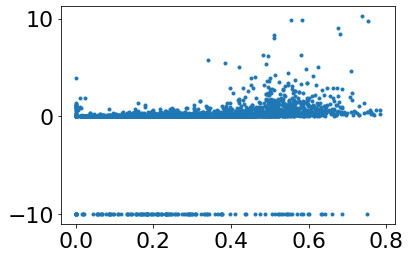

In [1120]:
x = slps[a.index]
y = a['EBE_MMKYR']/1000
plt.plot(x, y,'.')
plt.plot(x[y<1.5e-3],y[y<1.6e-3],'.')
plt.yscale('log')
#plt.xscale('log')

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/423490288.py:12: RuntimeWarning: divide by zero encountered in log10
  r = np.abs(np.log10(x) - np.log10(y))
/Users/gr_1/opt/miniconda3/envs/ee/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


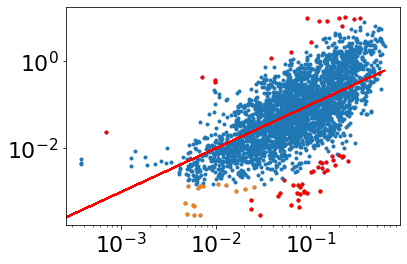

In [1320]:
metric = r3s
idx = metric >0
i = np.argmax(metric[idx])
x = dfs[idx][i] * 10 ** (pcoef[idx][i])
y = a['ebe_mmkyr'.upper()]/1000
plt.plot(x,y,'.')
plt.yscale('log')
plt.xscale('log')
plt.plot(x,x,'r')
plt.plot(x[y<1.51e-3],y[y<1.51e-3],'.')

r = np.abs(np.log10(x) - np.log10(y))
l = np.quantile(r[r>0],.95)

plt.plot(x[r>l],y[r>l],'.r')

In [ ]:
outliers = ((r>l) & (x>0)) & (y<1e0)
np.save('outliers',outliers)

In [ ]:
fig,ax = plt.subplots(figsize=(20,10))
data = a[((r>l) & (x>0)) & (y<1e0)]
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# world.plot(ax=ax)
# ax.plot(data.centroid.x,data.centroid.y,'.k')
plt.plot(data['SLP_STD'],'.')
plt.yscale('log')

In [ ]:
plt.figure(figsize=(5,5))
metric = r4s
idx = metric >0
i = np.argmin(metric[idx])
x = dfs[idx][i] * 10**(pcoef[idx][i])
y = a['ebe_mmkyr'.upper()]/1000
plt.plot(x,y,'.',alpha=.15,markersize=10)
plt.yscale('log')
plt.xscale('log')
plt.plot(x,x,'r')
plt.xlim([.0005,1])

(0.001, 2)

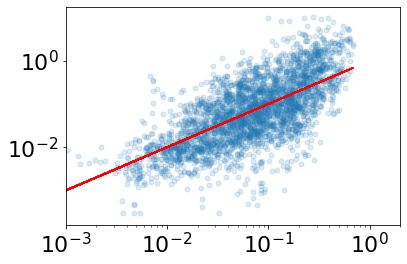

In [1321]:

plt.figure(figsize=(6,4))
metric = r4s
idx = metric >0
i = np.argmin(metric[idx])
x = dfs[idx][i] * 10**(pcoef[idx][i])
y = a['ebe_mmkyr'.upper()]/1000
plt.plot(x,y,'.',alpha=.15,markersize=10)
plt.yscale('log')
plt.xscale('log')
plt.plot(x,x,'r')
plt.xlim([.001,2])

In [145]:
len(a)

3281

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2389079584.py:7: RuntimeWarning: invalid value encountered in log10
  y = np.log10(a['EBE_MMKYR'].to_numpy())


0.4634280540339568

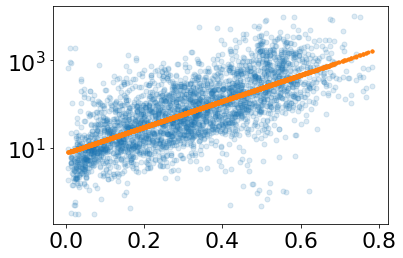

In [860]:

from sklearn.linear_model import LinearRegression as lr
#regression on the slope data to find the outliers
a['slps'] = slps[a.index]
idx = a.index
l = lr()
x = a['slps'].to_numpy()
y = np.log10(a['EBE_MMKYR'].to_numpy())
I = (y<1000000) & (y>-100000) & (x>0)
y = y[I]
x = x[I]
idx = idx[I]
l = l.fit(x.reshape(-1,1),y.reshape(-1,1))
y2 = l.predict(x.reshape(-1,1))
plt.figure()
plt.plot(x, 10**y, '.',markersize=10,alpha=.15)
plt.plot(x, 10**(y2),'.')
plt.yscale('log')
r = pd.DataFrame({'r':y2.ravel()- y.ravel()})
r_ = r['r'].to_numpy()
I = np.abs(r_) > np.quantile(r_,.99)
idx = idx[I]
#plt.plot(x[I],10**y[I],'.r')
#np.save('outliers',idx)
r2 = sklearn.metrics.r2_score((y.reshape(-1,1)),(y2.reshape(-1,1)),)

# metric = r3s
# plt.figure()
# i = np.argmax(metric[metric>0])
# a2 = a.copy()
# x = dfs[metric>0][i] * 10 ** (pcoef[i])
# y = a['ebe_mmkyr'.upper()]/1000
# plt.plot(x,y,'.')

# #sns.histplot(r,kde=True)
# a2 = a2.drop(idx)

# idx2 = idx.copy()
# idx = metric > 0
# x = dfs[metric>0][i] * 10**(pcoef[i])
# x = x[a2.index]
# y = a2['ebe_mmkyr'.upper()].to_numpy()/1000
# r = np.abs(np.log10(y)-np.log10(x))
# l = np.quantile(r[r>0],.999)#3*np.std(r[(r<100000)])
# id2 = r<l
# id2 = idx
# id3 = (r>l) & (y<1e-1) & (y>0) & (x>0) & (x<np.inf)
# plt.plot(x,y,'.')
# #plt.plot(x[id2],y[id2],'.')

# plt.yscale('log')
# plt.xscale('log')
# plt.ylim(.00001,30)

# plt.plot(x,x,'r')
# r2s[idx][i]

r2

In [818]:
np.max(r2s)

0.47956688272309633

In [ ]:
metric  = 'slps'
plt.plot(a[metric],a['EBE_MMKYR'],'.')
#plt.ylim([0, 1000])
#plt.plot(a[id3][metric], a[id3]['EBE_MMKYR'],'.')
plt.yscale('log')
plt.xlim(.01,.8)
#a['COUNTRY']

In [ ]:
metric  = 'ELEV_AVE'
plt.plot(a[metric],a['EBE_MMKYR'],'.')
plt.plot(a[id3][metric], a[id3]['EBE_MMKYR'],'.')
plt.yscale('log')
#plt.xscale('log')
#a['COUNTRY']

<sub>est</sub>

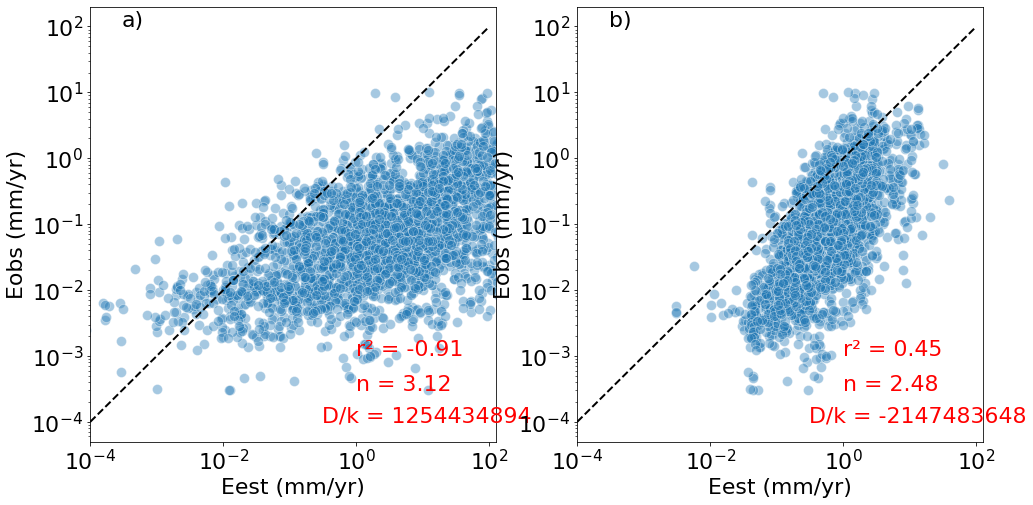

In [1322]:
fig,ax=plt.subplots(1,2,figsize=(16,8))

ds = [195,-42]
a['Eobs (mm/yr)'] = a['ebe_mmkyr'.upper()] / 1000

for i in range(2):
    plt.sca(ax[i])
    n1 = np.argsort(r2s)[ds[i]]
    a['Eest (mm/yr)'] = dfs[n1] *  np.exp(pcoef[n1]) #* np.exp(s2s[np.argmax(r2s)]/2)
    q=np.quantile(a['area'.upper()],.8)
    A = a['area'.upper()] > q

    a_big = a[A]
    a_smal = a[A==False]

    sns.scatterplot(data=a,x='Eest (mm/yr)',y='Eobs (mm/yr)', s=100, alpha=.4)

    xi = np.linspace(10**-4,10**2,1000)
    plt.plot(xi, xi,'k--',linewidth=2)
    plt.xlim([10**-4,10**2.1])
    plt.yscale('log')
    plt.xscale('log')
    r2s[n1]
    plt.text(1,.001,'r'+'2'.translate(superscript) + ' = ' + str(np.round(r2s[n1], 2)),c='r')
    plt.text(1,.0003,'n' + ' = ' + str(np.round(ns[n1], 2)),c='r')
    plt.text(.3,.0001,'D/k' + ' = ' + str(np.int32(diffus[n1]/1e-11)),c='r')
    plt.text(.0003,100,['a)','b)'][i])





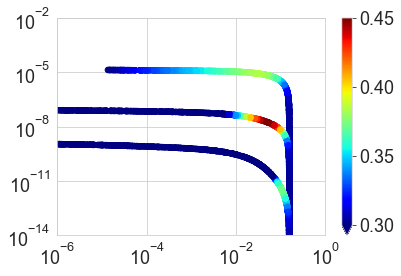

In [795]:
diffus1 = np.load('outputs/constant_n1/d.npy')
pcoef_d1 = np.load('outputs/constant_n1/k.npy')
r2s1 = np.load('outputs/constant_n1/r2.npy')

diffus2 = np.load('outputs/constant_n2/d.npy')
pcoef_d2 = np.load('outputs/constant_n2/k.npy')
r2s2 = np.load('outputs/constant_n2/r2.npy')

diffus3 = np.load('outputs/constant_n3/d.npy')
pcoef_d3 = np.load('outputs/constant_n3/k.npy')
r2s3 = np.load('outputs/constant_n3/r2.npy')

plt.scatter(diffus1*pcoef_d1/1e-8,pcoef_d1, c= r2s1,cmap='jet',s=30,vmin=.3,vmax=.45)
plt.scatter(diffus2*pcoef_d2/1e-8,pcoef_d2, c= r2s2,cmap='jet',s=30,vmin=.3,vmax=.45)
plt.scatter(diffus3*pcoef_d3/1e-8,pcoef_d3, c= r2s3,cmap='jet',s=30,vmin=.3,vmax=.45)

plt.xscale('log')
plt.yscale('log')
plt.ylim([10**-14,10**-2])
plt.xlim([.000001,1])
plt.colorbar(extend='min')
#plt.xlabel('D')
#lt.ylabel('k (t-1)')

In [1078]:
np.save('outputs/constant_n3/d',diffus)
np.save('outputs/constant_n3/k',pcoef_d)
np.save('outputs/constant_n3/r2',r2s)

(0.25, 0.75)

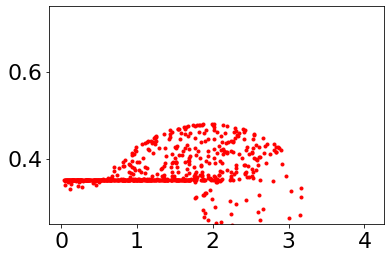

In [1324]:
pc_corr = np.exp(pcoef_d/2)*np.exp(pcoef)*1e-8
ns = ns+np.random.rand(len(ns))*.05
plt.plot(ns,r2s,'.',c='r')
#plt.xscale('log')
plt.ylim([.25,.75])

In [1325]:
w = np.where(r2s>.1)[0][40]
print(diffus[w])
y = dfs[w]
plt.plot(a['ebe_mmkyr'], y[:len(a)],'.')
plt.xscale('log')
#plt.yscale('log')

22.924588931787415


KeyError: 'ebe_mmkyr'

In [1158]:
np.max(r2s)

0.4820881587495247

Text(0, 0.5, 'r²')

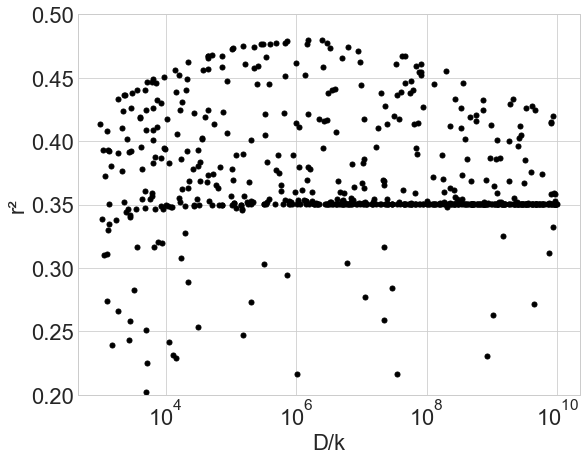

In [1336]:
plt.style.use('seaborn-whitegrid')
fig,ax = plt.subplots(figsize=(9,7))
plt.plot(diffus/1e-8/100,r2s,'.k',markersize=10)

plt.xscale('log')
#plt.xlim([0, 1])
#
plt.ylim([.2, .5])
plt.xlabel('D/k')
#plt.xlabel('E' + '$_{diffusion}$'.translate(subscript) + '/' + 'E' + '$_{total}$'.translate(subscript) )
#plt.xlabel('Critical area (km' +'2'.translate(superscript)+')')
plt.ylabel('r'+'2'.translate(superscript))
#plt.ylabel('log(D/k)')
#plt.xlim(([0, 2.5]))


In [1329]:
[np.argmax(r2s)]

1.992861023332021

In [348]:
a['log(residual (m/Myr))'] = np.log10(a['ebe_mmkyr']/1000) - np.log10(dfs[np.argsort(r2s)[-1]][:len(a)])
a['(residual (m/Myr))'] = a['ebe_mmkyr']/1000 - dfs[np.argsort(r2s)[-1]][:len(a)]
# a['log(erate (m/Myr))'] = np.log10(a['ebe_mmkyr']/1000)
# a['log(residual (m/Myr))'][a['log(residual (m/Myr))'].isna()] = np.nan
# a['log(residual (m/Myr))'][np.abs(a['log(residual (m/Myr))']) > 1e7] = np.nan
# a['log(err (m/Myr))'] = np.log10(a['ebe_err'])

# a['norm log(residual (m/Myr))'] = np.log10(a['ebe_mmkyr']/1000) - np.log10(dfs[np.argsort(r2s)[-1]][:len(a)]) / a['log(erate (m/Myr))']
# a['norm log(err (m/Myr))'] = np.log10(a['ebe_err']) / a['log(erate (m/Myr))']

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_2018/3705599146.py:1: RuntimeWarning: divide by zero encountered in log10
  a['log(residual (m/Myr))'] = np.log10(a['ebe_mmkyr']/1000) - np.log10(dfs[np.argsort(r2s)[-1]][:len(a)])


In [1318]:
plt.plot(a['(residual (m/Myr))'].to_numpy(),'.')
plt.yscale([-10, 10])

KeyError: '(residual (m/Myr))'

In [1317]:
plt.plot(a['log(residual (m/Myr))'] ,'.')
s2 = np.mean(a['log(residual (m/Myr))'].to_numpy()[a['log(residual (m/Myr))'] < 1000000]**2)
np.exp(s2/2)

KeyError: 'log(residual (m/Myr))'

In [ ]:
g = sns.regplot(data = a, x = 'log(erate (m/Myr))',y='log(err (m/Myr))', scatter_kws={'alpha':0.3},line_kws={'color':'k'})

KeyError: 'log(err (m/Myr))'

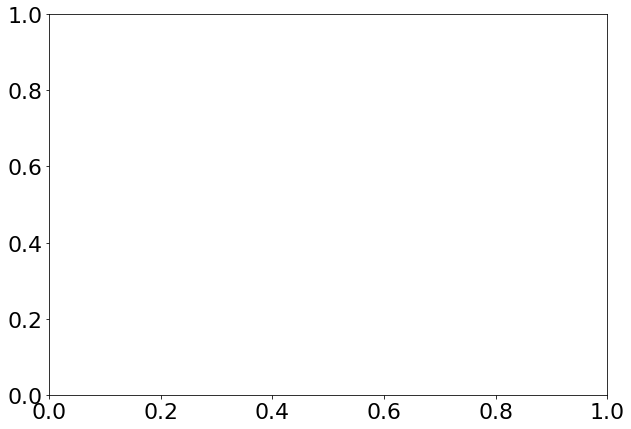

In [1316]:
fig,ax = plt.subplots(figsize=(10,7))
a2 = pd.DataFrame()
import scipy as sp
p2 = 'log(residual (m/Myr))'
p1 = 'log(err (m/Myr))'
#p2 = 'log(erate (m/Myr))'
#p1 = 'log(residual (m/Myr))'
g = sns.regplot(data = a, x = p1,y= p2, scatter_kws={'alpha':0.3},line_kws={'color':'k'})
y=a[p2][~np.logical_or(np.isnan(a[ p2]),np.isnan(a[p1]))]
x=a[p1][~np.logical_or(np.isnan(a[ p2]),np.isnan(a[p1]))]
y=y[np.logical_not(np.logical_or(np.isinf(y),np.isinf(x)))]
x=x[np.logical_not(np.logical_or(np.isinf(x),np.isinf(x)))]

r, p = sp.stats.pearsonr(x,y)

plt.text(-1,2,'r² = '+str(np.round(r,2)))
plt.show()

KeyError: 'norm log(residual (m/Myr))'

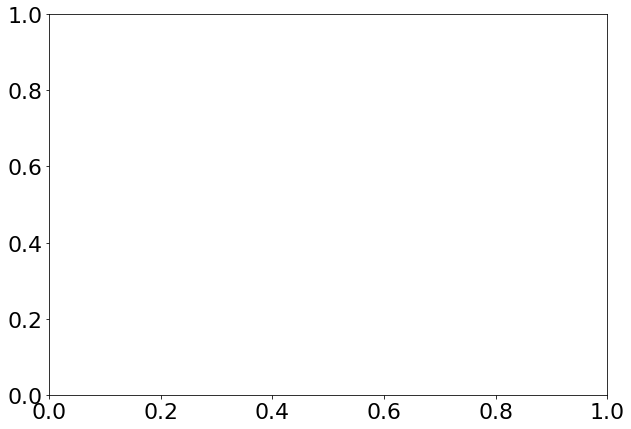

In [1315]:
fig,ax = plt.subplots(figsize=(10,7))

import scipy as sp
g = sns.regplot(data = a, x = 'norm log(residual (m/Myr))',y='norm log(err (m/Myr))', scatter_kws={'alpha':0.3},line_kws={'color':'k'})
a[ 'log(residual (m/Myr))'][np.isnan(a[ 'log(residual (m/Myr))'])] = 0
a[ 'log(err (m/Myr))'][np.isnan(a[ 'log(err m/Myr)'])] = 0
plt.xlim([-50, 50])
plt.ylim([-50, 50])
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['log(residual (m/Myr))'], data['log(err m/Myr)'])
    ax = plt.gca()
    
    return r
plt.text(-1,4,'r² = '+str(np.round(annotate(a),2)))
plt.show()

1401748970.3296337

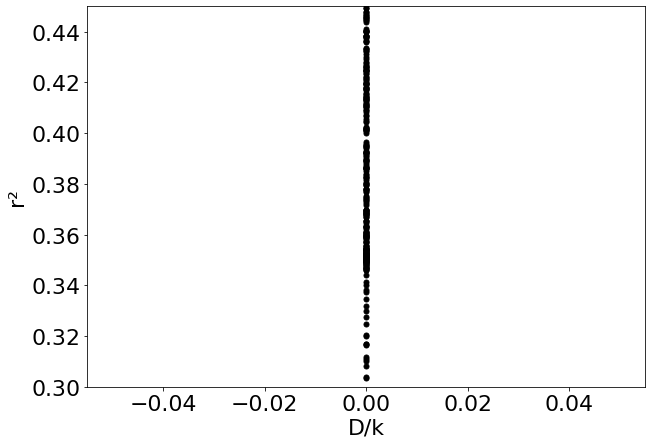

In [1314]:
log = np.log10
fig,ax = plt.subplots(figsize=(10,7))
plt.plot(dratave*1000,r2s,'.k',markersize=10)
#plt.xscale('log')
plt.xlabel('D/k')
#plt.xlim([1,10**8])
plt.ylim([.3, .45])
plt.ylabel('r'+ '2'.translate(superscript))
diffus[np.argmin(r2s)]/ks[np.argmin(r2s)]

In [95]:
#grid.values[grid.values>2000] = 2000


In [1309]:

import pygmt 
grid = pygmt.datasets.load_earth_relief(resolution="03m",region=[-179,179,-80,80])
#grid.values[grid.values<-5000] = -5000
fig = pygmt.Figure()
fig.grdimage(grid=grid, projection="R12c", cmap="terra")
fig.colorbar(frame=["a2500", "x+lElevation", "y+lm"])
fig.show()

grdcut [ERROR]: Libcurl Error: Couldn't resolve host name
grdcut [WARNING]: You can turn remote file download off by setting GMT_DATA_UPDATE_INTERVAL to "off"
grdcut [ERROR]: File /Users/gr_1/.gmt/cache/earth_relief_03m was not found
grdcut [ERROR]: Cannot find file /Users/gr_1/.gmt/cache/earth_relief_03m
grdcut [ERROR]: File /Users/gr_1/.gmt/cache/earth_relief_03m was not found
grdcut [ERROR]: Cannot find file /Users/gr_1/.gmt/cache/earth_relief_03m
grdcut [ERROR]: File /Users/gr_1/.gmt/cache/earth_relief_03m not found
[Session pygmt-session (1)]: Error returned from GMT API: GMT_FILE_NOT_FOUND (16)


GMTCLibError: Module 'grdcut' failed with status code 16:
grdcut [ERROR]: Libcurl Error: Couldn't resolve host name
grdcut [ERROR]: File /Users/gr_1/.gmt/cache/earth_relief_03m was not found
grdcut [ERROR]: Cannot find file /Users/gr_1/.gmt/cache/earth_relief_03m
grdcut [ERROR]: File /Users/gr_1/.gmt/cache/earth_relief_03m was not found
grdcut [ERROR]: Cannot find file /Users/gr_1/.gmt/cache/earth_relief_03m
grdcut [ERROR]: File /Users/gr_1/.gmt/cache/earth_relief_03m not found

In [1310]:
ns[np.argmax(r2s)]

1.9028155890620786

Text(0.5, 0, 'D/k ratio')

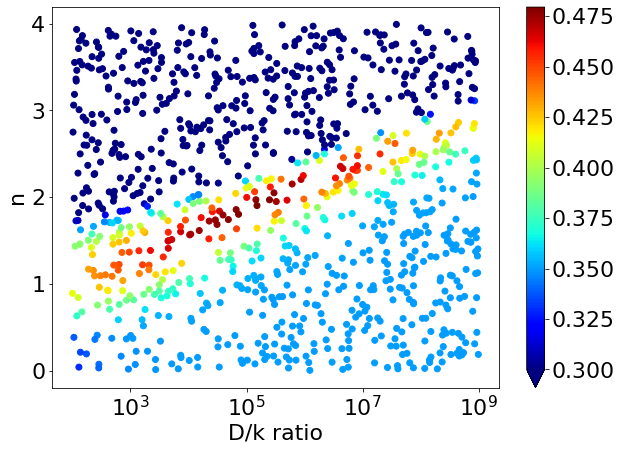

In [1311]:
fig,ax = plt.subplots(figsize=(10,7))
ax = plt.scatter(diffus/1e-8/1e3,ns,c=r2s,cmap='jet',vmin = .3)
plt.xscale('log')
plt.colorbar(ax,extend='min')
plt.ylabel('n')
plt.xlabel('D/k ratio')

In [590]:
np.max(r2s)

0.4797915939833407

In [566]:
pcoef_d[np.argmax(r3s)]

3.843848922220951e-09

Text(0.5, 0, 'D/k ratio')

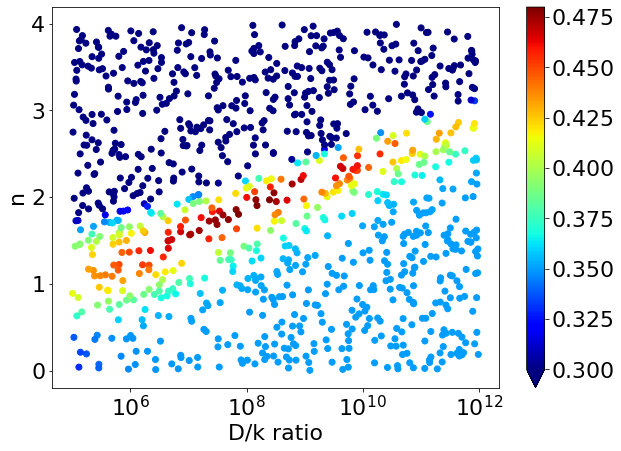

In [861]:
fig,ax = plt.subplots(figsize=(10,7))
ax = plt.scatter(diffus/1e-8,ns,c=r2s,cmap='jet',vmin=.3,vmax=.48)#,vmin=.45)
plt.xscale('log')
plt.colorbar(ax,extend='min')
plt.ylabel('n')
plt.xlabel('D/k ratio')

In [779]:
ns[np.argmax(r2s)]

1.9028155890620786

Text(0, 0.5, 'r²')

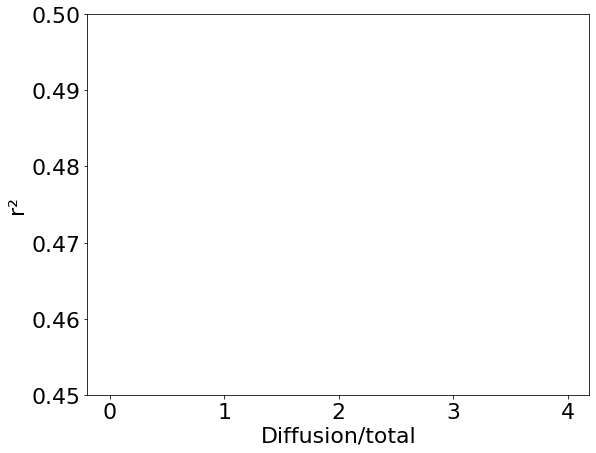

In [1312]:
fig,ax = plt.subplots(figsize=(9,7))
plt.plot(ns,dratave,'.k')
#plt.xscale('log')
plt.ylim([.45,.5])
plt.xlabel('Diffusion/total')
plt.ylabel('r'+ '2'.translate(superscript))

In [1313]:
plt.plot(a['eal_mmkyr'],a['ebe_mmkyr'],'.')
plt.xscale('log')
plt.yscale('log')
plt.plot(a['eal_mmkyr'], a['eal_mmkyr'])

KeyError: 'eal_mmkyr'

In [126]:
pcoef_d[np.argsort(r2s)[-1]]

1.6634645135932693

In [127]:
np.max(r2s)

0.4563722865128347

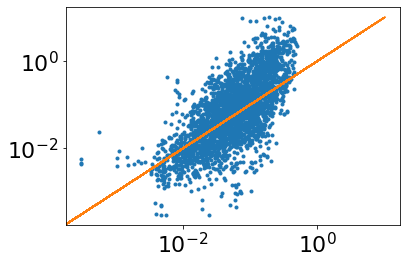

In [781]:
plt.plot(dfs[np.argsort(r2s)[-1]][:len(a)]*np.exp(pcoef_d[np.argsort(r2s)[-1]]/2)*np.exp(pcoef[np.argsort(r2s)[-1]]),a['ebe_mmkyr'.upper()]/1000,'.')
plt.plot(a['ebe_mmkyr'.upper()]/1000,a['ebe_mmkyr'.upper()]/1000)
plt.xscale('log')
plt.yscale('log')

In [ ]:
from sklearn.linear_model import 

In [31]:
r = np.log(dfs[np.argsort(r2s)[-1]][:len(a)]*np.exp(pcoef[np.argsort(r2s)[-1]])) -np.log(a['ebe_mmkyr']/1000)

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_10459/1739030071.py:1: RuntimeWarning: divide by zero encountered in log
  r = np.log(dfs[np.argsort(r2s)[-1]][:len(a)]*np.exp(pcoef[np.argsort(r2s)[-1]])) -np.log(a['ebe_mmkyr']/1000)


In [38]:
np.sqrt(np.sum(r[np.abs(r)<10]**2))/len(r[np.abs(r)<10])

NameError: name 'r' is not defined

2.2972948000228746

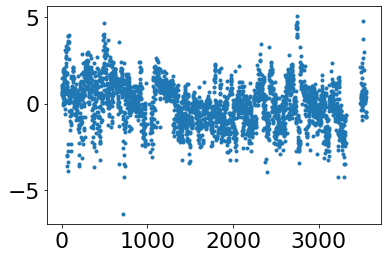

In [72]:
plt.plot(r,'.')
np.exp(np.sum(r[np.abs(r) < 10] ** 2) / len(r[np.abs(r) < 10]) / 2)

In [ ]:
mm/yr = m / kyr

In [28]:
np.exp(pcoef[np.argsort(r2s)[-1]])

0.511276160095673

In [25]:
dfs[np.argsort(r2s)[-1]][:len(a)]

array([0.        , 0.03032306, 0.0336224 , ..., 0.01139245, 0.01047059,
       0.01073412])

In [89]:
np.max(a['ebe_mmkyr']/1000)

118.86446000000001

In [34]:
r = np.abs(dfs[np.argsort(r2s)[-1]][:len(a)]*np.exp(pcoef[np.argsort(r2s)[-1]]) - a['ebe_mmkyr']/1000)
r[np.isnan(r)] = 0
ls = np.argsort(r)
ls = np.array(ls)
#np.max(ls[np.logical_not(np.isnan(ls))])

In [149]:
bads = pd.DataFrame()
#ls = np.sort(np.abs(dfs[np.argsort(r2s)[-1]][:len(a)]*np.exp(pcoef[np.argsort(r2s)[-1]]) - a['ebe_mmkyr']/1000)).values

for i in range(1,100):
    l = ls[-i]
    bads = bads.append(a.iloc[l:l+1])

In [151]:
bads.to_csv('/users/gr_1/Documents/largest_residuals.csv')

In [36]:
np.abs(dfs[np.argsort(r2s)[-1]][:len(a)]*np.exp(pcoef[np.argsort(r2s)[-1]]))[np.argmax(a['ebe_mmkyr'])]

0.19408470091980498

KeyError: 'ebe_mmkyr'

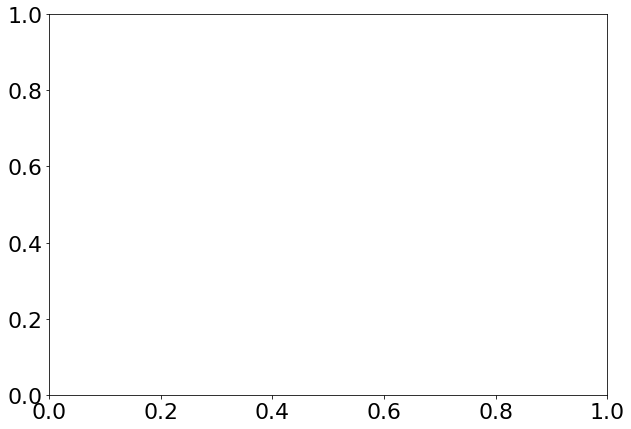

In [251]:
fig,ax = plt.subplots(figsize=(10,7))

plt.plot(dfs[10][:len(a)]*np.exp(pcoef[10]),a['ebe_mmkyr']/1000,'.')
plt.plot(a['ebe_mmkyr']/1000,a['ebe_mmkyr']/1000)
plt.xscale('log')
plt.yscale('log')
plt.xlim([10**-3, 1])
plt.xlabel('(m/Myr)')

plt.ylabel('10'.translate(superscript) + 'Be erosion rate(m/Myr)')

KeyError: 'ebe_mmkyr'

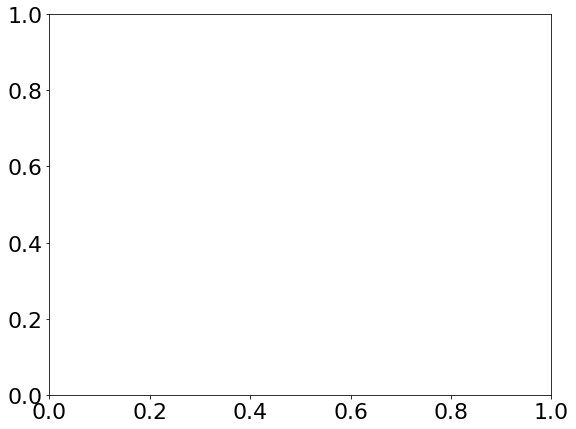

In [252]:
plt.subplots(figsize=(9,7))
n1 = 998# Xth worst estimate
plt.plot(dfs[np.argsort(r2s)[-n1]][:len(a)]*np.exp(pcoef[np.argsort(r2s)[-n1]]),a['ebe_mmkyr']/1000,'.')
plt.plot(a['ebe_mmkyr']/1000,a['ebe_mmkyr']/1000)
plt.text(1,.001, 'r' + '2'.translate(superscript) + ' = ' + str(r2s[np.argsort(r2s)[-n1]])[:5])
plt.xscale('log')
plt.yscale('log')
print(ns[np.argsort(r2s)[-n1]])
diffus[np.argsort(r2s)[-n1]]/ks[np.argsort(r2s)[-n1]]

In [253]:
sns.boxplot(data=a,y ='ebe_mmkyr')
a['log(ebe_mmkyr)'] = np.log10(a['ebe_mmkyr'])
plt.yscale('log')

ValueError: Could not interpret input 'ebe_mmkyr'

In [228]:
diffus[np.argmax(r2s)]/ks[np.argmax(r2s)]

1804.5545601198119

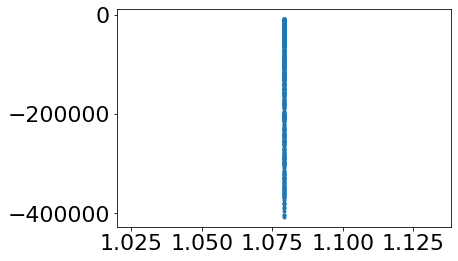

In [497]:
plt.plot(np.log10(careas),resid,'.')
#plt.ylim([.2, .5])

In [156]:
l = np.log10(diffus/ks)
plt.hist(l[r2s>.3])
#plt.plot(np.log10(diffus/ks),r2s,'.')
#plt.ylim([.2, .5])

ValueError: operands could not be broadcast together with shapes (200,) (3600,) 

NameError: name 'areas' is not defined

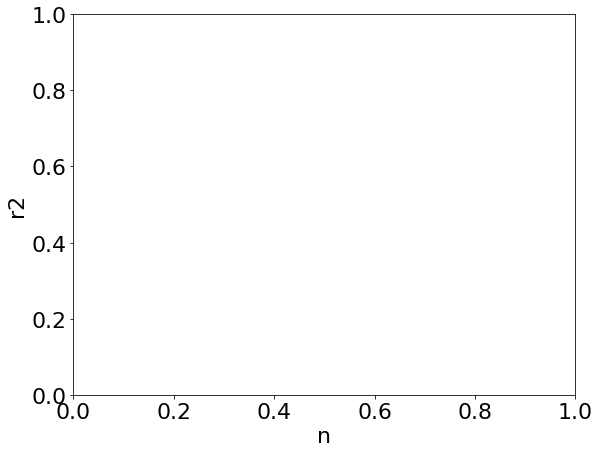

In [248]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize = (9,7))
plt.xlabel('n')
plt.ylabel('r2')
plt.scatter(ns,r2s,10,c=a[areas])
plt.ylim([0,.5])
#plt.xscale('log')
#plt.yscale('log')


In [685]:
ns[np.argsort(r2s)[-10]]

1.79423174718459

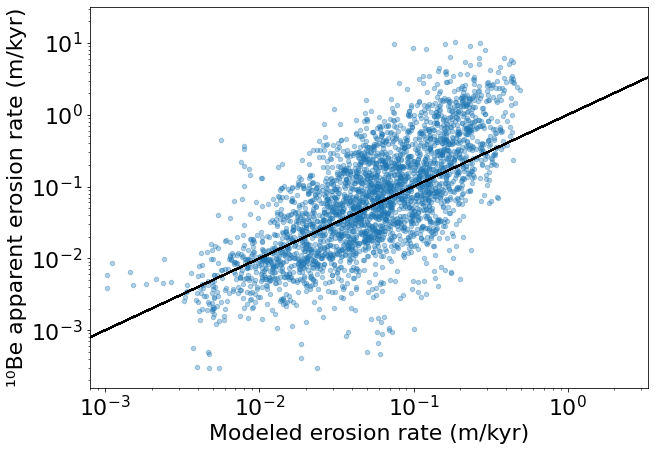

In [834]:
fig, ax = plt.subplots(figsize = (10,7))
io =np.argsort(r2s)[-1]
plt.scatter(dfs[io][:len(a)]*np.exp(pcoef[io]),a['ebe_mmkyr'.upper()]/1000,s=20,alpha=.35)
plt.plot(a['ebe_mmkyr'.upper()]/1000,a['ebe_mmkyr'.upper()]/1000,'k')
plt.xlim([10**-3.1,10**.52])
plt.ylim([10**-3.8,10**1.5])
plt.xlabel('Modeled erosion rate (m/kyr)')
plt.ylabel('{}Be apparent erosion rate (m/kyr)'.format('10'.translate(superscript)))
plt.xscale('log')
plt.yscale('log')
#plt.colorbar()

In [691]:
plt.plot(slps2[:3553], a['slp_ave'], '.')

NameError: name 'slps2' is not defined

NameError: name 'slps2' is not defined

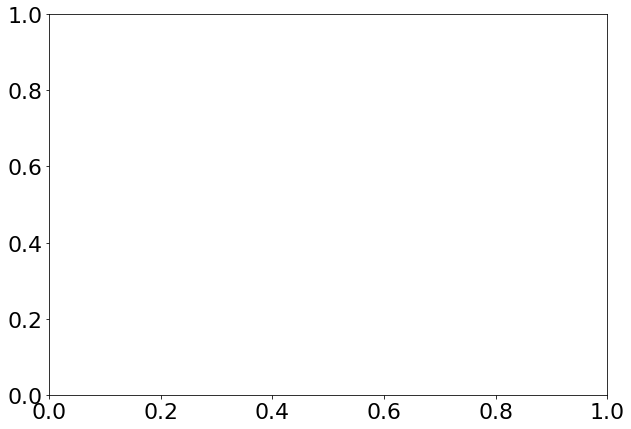

In [805]:
fig, ax = plt.subplots(figsize = (10,7))
io =np.argmax(r2s)
#plt.scatter(dfs[io][:len(a)]*np.exp(pcoef[io]),a['ebe_mmkyr']/1000,s=20)
r = lm.LinearRegression()
x = np.array(slps2[:3553])
x = np.log10(x)
y = a['ebe_mmkyr'].to_numpy()
y = np.log10(y)
isn = np.logical_and(np.logical_not(np.isnan(x)), np.logical_not(np.isnan(y)))
isi = np.logical_and(np.logical_not(np.isinf(x)), np.logical_not(np.isinf(y)))
isni = np.logical_and(isn,isi)
x = x[isni]

y = y[isni]
r= r.fit(x.reshape(-1,1),y)
y2 = r.predict(x.reshape(-1,1))
print(sklearn.metrics.r2_score(y.reshape(-1,1),y2.reshape(-1,1)))
plt.plot(10**x,10**y,'.')
plt.xlim([10**-2,10**0])
plt.plot(10**x,10**y2,linewidth=3)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Modeled erosion rate (m/kyr)')
plt.ylabel('{}Be apparent erosion rate (m/kyr)'.format('10'.translate(superscript)))

#plt.colorbar()

NameError: name 'slps2' is not defined

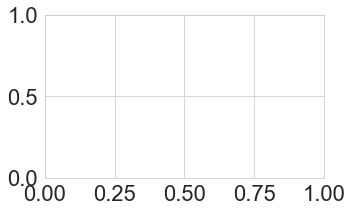

In [164]:
fig, ax = plt.subplots(figsize = (5,3))
slpsall = np.load('slpsall.npy')
plt.scatter(slps2[:3553][slps2[:3553]>0],a['slp_ave'][slps2[:3553]>0]/1000,c='k', s=1)
plt.plot(a['slp_ave']/1000,a['slp_ave']/1000)
plt.xlabel('Slope D8')
plt.ylabel('Slope Octopus')

#plt.xscale('log')
#plt.yscale('log')


In [56]:
len(np.where(np.abs(slps2[:3553][slps2[:3553]>0] - a['slp_ave'][slps2[:3553]>0]/1000)>.2)[0]) 

50

In [138]:
#slps1 = gpd.read_file('basins_aspect_means_0 (2).csv')
#slps1 = pd.to_numeric(slps1['slp_ave'],errors='coerce')

NameError: name 'slps2' is not defined

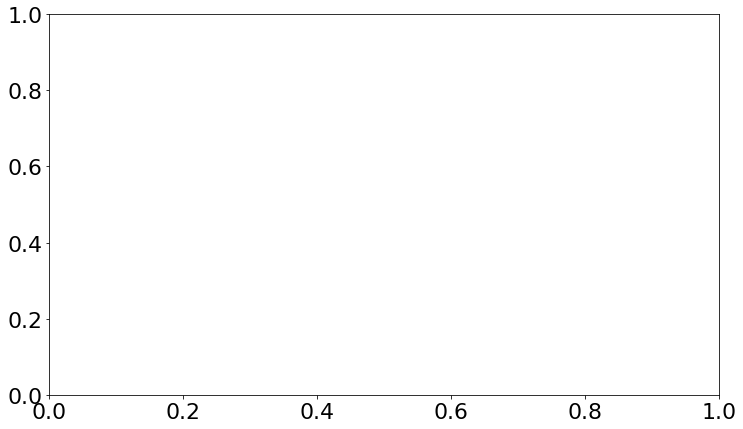

In [828]:
fig, ax = plt.subplots(figsize = (12,7))
slpsall = np.load('slpsall.npy')
plt.scatter(slps2[:3553], a['slp_ave']/1000,c=np.log10(a['area']),cmap='jet')
plt.plot(a['slp_ave']/1000,a['slp_ave']/1000)
#plt.xscale('log')
#plt.yscale('log')


In [225]:
np.argmax((slps2[:3553][slps2[:3553]>0] - a['slp_ave'][slps2[:3553]>0]/1000))

2145

In [158]:
plt.hist((np.abs(slps2[:3553][slps2[:3553]>0] - a['slp_ave'][slps2[:3553]>0]/1000)))
len(np.where(np.abs(slps2[:3553][slps2[:3553]>0] - a['slp_ave'][slps2[:3553]>0]/1000) > .05)[0])

NameError: name 'slps2' is not defined

NameError: name 'slps2' is not defined

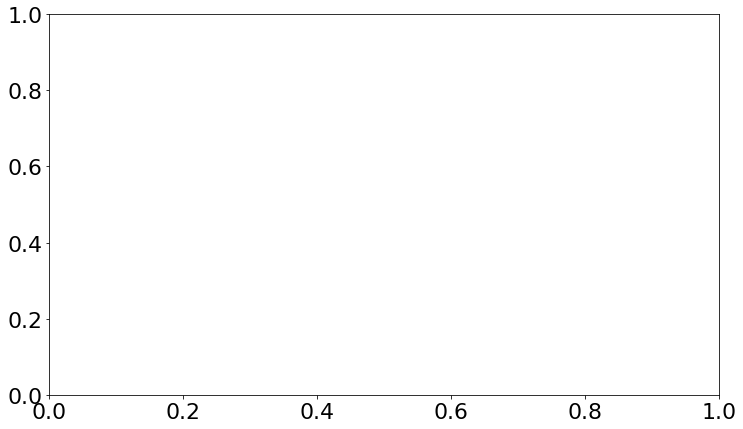

In [767]:
fig, ax = plt.subplots(figsize = (12,7))
slpsall = np.load('slpsall.npy')
plt.scatter(slps2[:3553], a['ebe_mmkyr']/1000,c=(a.centroid.y),vmin=-50,vmax=50,cmap='jet')
plt.yscale('log')

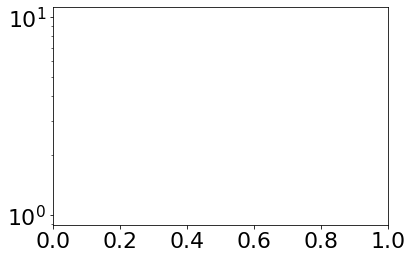

In [1018]:
plt.yscale('log')

<ipython-input-195-77bdca639977>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  plt.plot(a.area[a['area']>0], '.')
<ipython-input-195-77bdca639977>:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  plt.plot(a.area[slps2[:3553] == 0][a.area>0], 'r.')


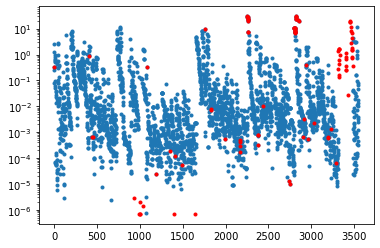

In [195]:
plt.plot(a.area[a['area']>0], '.')
plt.plot(a.area[slps2[:3553] == 0][a.area>0], 'r.')

plt.yscale('log')

In [189]:
np.mean(a['area'][a['area']>0])

3705.5099137177367

In [85]:
dfs[np.argsort(r2s)[-1]]

array([0.        , 0.02312291, 0.02453309, ..., 0.        , 0.        ,
       0.        ])

KeyError: 'ebe_mmkyr'

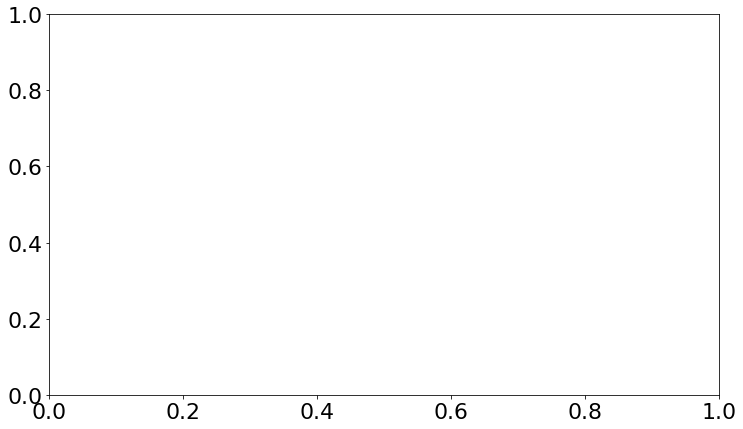

In [783]:
fig, ax = plt.subplots(figsize = (12,7))
r2s = -resid
plt.scatter(dfs[np.argsort(r2s)[-1]][:len(a)]*np.exp(pcoef[np.argsort(r2s)[-1]]),a['ebe_mmkyr']/1000,s=10)
plt.plot(a['ebe_mmkyr']/1000,a['ebe_mmkyr']/1000,'k')
plt.xlim([10**-3.2,10**.5])
plt.ylim([10**-3.5,10**1.2])
plt.xlabel('Erosion estimate (m/kyr)')
plt.ylabel('Erosion measured (m/kyr)')
plt.xscale('log')
plt.yscale('log')
#c = plt.colorbar()
#c.set_label('log(Drainage area (km)' + '2'.translate(superscript) + ')')

In [92]:
from scipy.stats import bartlett

(0.0, 0.5)

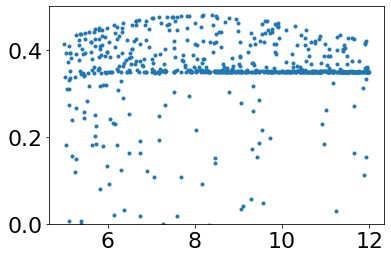

In [1020]:
plt.plot(np.log10(diffus/ks),r2s,'.')
plt.ylim([0,.5])

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_74321/4223691936.py:4: RuntimeWarning: divide by zero encountered in log10
  a['resid'] = -np.log10(dfs[np.argsort(r2s)[-1]][:len(a)]*np.exp(pcoef[np.argsort(r2s)[-1]]))+np.log10(a['ebe_mmkyr']/1000)
/Users/gr_1/opt/miniconda3/envs/ee/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_74321/4223691936.py:11: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 10**6])


(0.013385378085027523, 1000000)

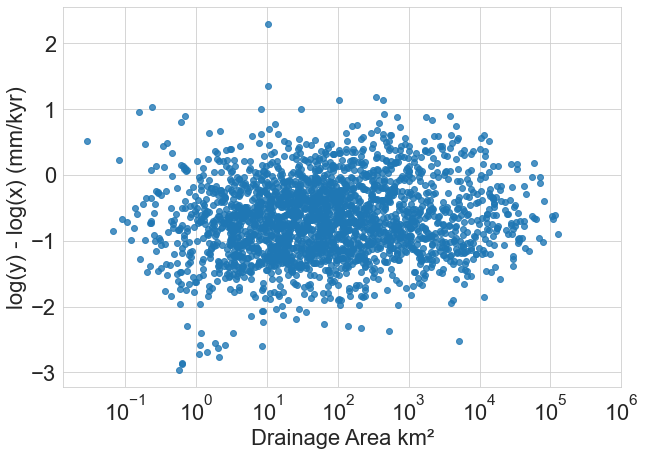

In [166]:
import seaborn as sns
plt.subplots(figsize = (10,7))
a['resid'] = 1
a['resid'] = -np.log10(dfs[np.argsort(r2s)[-1]][:len(a)]*np.exp(pcoef[np.argsort(r2s)[-1]]))+np.log10(a['ebe_mmkyr']/1000)
loc = a.index[np.isinf(a['resid'])]
#a['bio12'][loc] = 0
sns.regplot(data=a,x='area',y='resid',fit_reg=True,scatter=True)
plt.xscale('log')
plt.xlabel('Drainage Area ' + 'km' +'2'.translate(superscript))
plt.ylabel('log(y) - log(x) (mm/kyr)')
plt.xlim([0, 10**6])


In [ ]:
a['Residuals'] = np.log(a['ebe_mmkyr']/1000) - 

In [149]:
a2 = a.loc[~a['resid'].isna()]
a2 = a2.loc[~a2['area'].isna()]
a2 = a2.loc[~(a2['resid']>1e20)]
a2 = a2.loc[~(a2['area']>1e20)]
a2 = a2.loc[~(a2['resid']<-1e20)]
a2 = a2.loc[~(a2['area']<-1e20)]

In [151]:
p1 = a2['resid'][a2['area']>10**3].to_numpy()
p2 = a2['resid'][a2['area']<=10**3].to_numpy()

bartlett(p1,p2)

BartlettResult(statistic=4.28507663992576, pvalue=0.038448349142781967)

In [1481]:
fig,ax = plt.subplots(figsize=(10,7))
ax = plt.scatter(diffus/ks,ns,c=r2s,cmap='jet',vmin=.3)
plt.xscale('log')
plt.colorbar(ax,extend='min')
plt.ylabel('n')
plt.xlabel('D/k ratio')

array([   0,   37,  113,  114,  408,  447,  449,  467, 1071, 1072, 1089,
       1184, 1349, 1391, 1407, 1474, 1494, 1671, 1765, 1832, 1833, 1999,
       2166, 2169, 2172, 2174, 2255, 2256, 2257, 2258, 2259, 2260, 2261,
       2262, 2263, 2381, 2382, 2385, 2433, 2746, 2751, 2803, 2804, 2805,
       2806, 2807, 2808, 2809, 2810, 2811, 2812, 2813, 2814, 2818, 2819,
       2820, 2821, 2822, 2851, 2852, 2905, 2912, 2939, 2967, 3028, 3199,
       3200, 3236, 3291])

In [ ]:
plt.scatter(np.log10(a['area']),np.log10(dfs[np.argmax(r2s)][:len(a)]*np.exp(pcoef[np.argmax(r2s)]))-np.log10(a['ebe_mmkyr']/1000),s=30)
plt.subplots(figsize=(5,5))
plt.scatter(np.log10(a['slp_ave']),np.log10(dfs[np.argmax(r2s)][:len(a)]*np.exp(pcoef[np.argmax(r2s)]))-np.log10(a['ebe_mmkyr']/1000),s=30)
plt.figure()
plt.scatter(np.log10(a['ebe_mmkyr']),np.log10(dfs[np.argmax(r2s)][:len(a)]*np.exp(pcoef[np.argmax(r2s)]))-np.log10(a['ebe_mmkyr']/1000),s=30)


In [153]:
import numpy as np
## Figures
folder = 'results/var_concavity_1//'
ns = np.load('{}/ns.npy'.format(folder),allow_pickle=True)
ms = np.load('{}/ms.npy'.format(folder),allow_pickle=True)
diffus = np.load('{}/diffu.npy'.format(folder),allow_pickle=True)
eros1 = np.load('{}/eros.npy'.format(folder),allow_pickle=True)
ks = np.load('{}/eros.npy'.format(folder),allow_pickle=True)

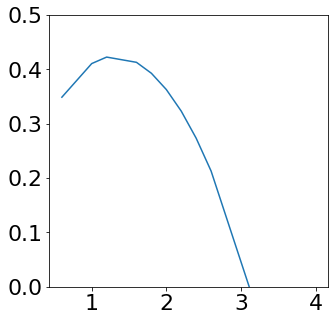

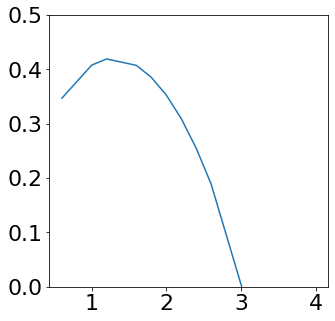

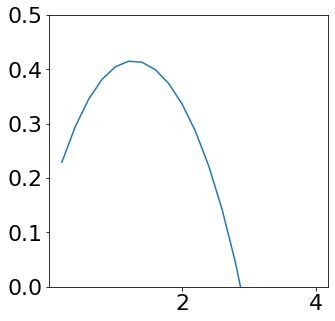

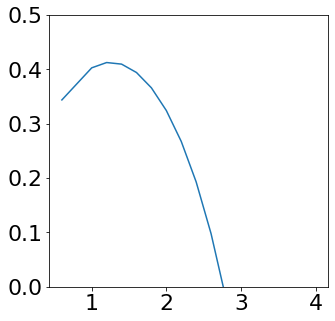

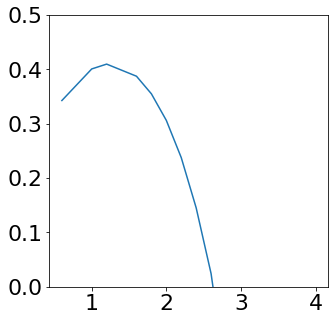

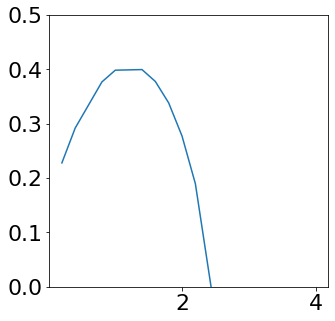

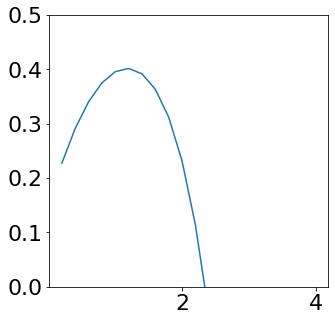

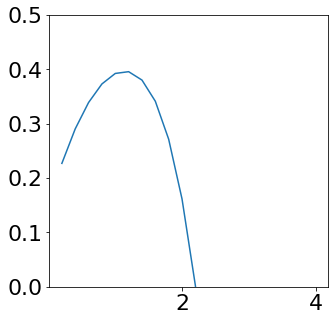

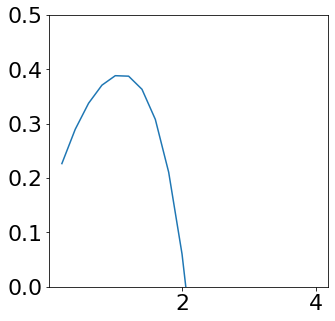

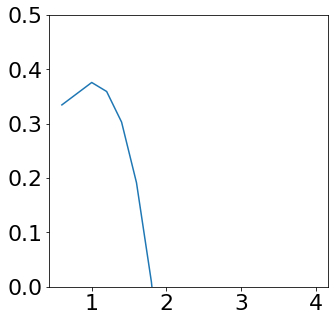

In [508]:
ss = np.unique(np.round(ms/ns,2))
o = np.zeros(len(ss))
for c,s in enumerate(ss):
    fig,ax = plt.subplots(figsize=(5,5))
    I = np.where(ms/ns==s)[0]
    plt.plot(ns[I],r2s[I])
    plt.ylim([0, .5])
    o[c] = np.max(r2s[I])
    c+=1


## Compare w/ bio data

In [1229]:
# maybe ... 
# a2 = gpd.read_file('/Users/gr_1/Documents/cosmo_predict/octo_327_data')
# a2 = a2.loc[a.index]
# a = a2
#a.index = range(len(a))
#a.index
#a.index = range(len(a))
#a = a[(a['ebe_mmkyr']>0)]

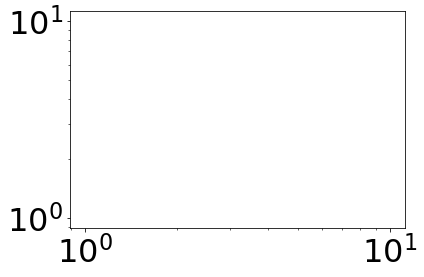

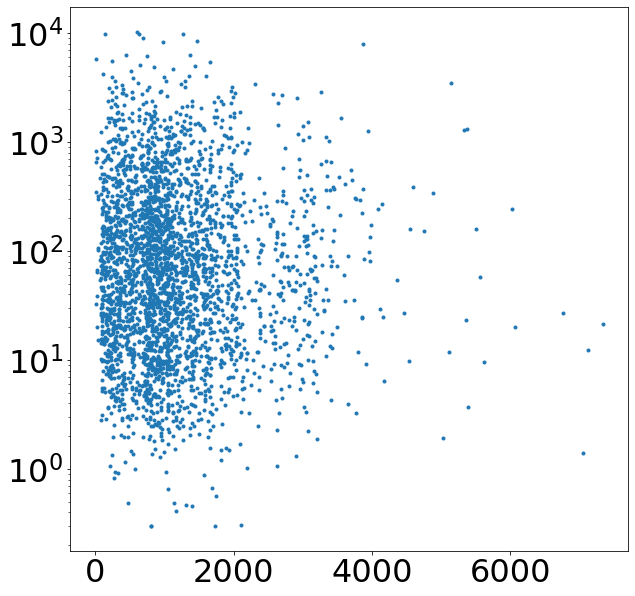

In [1291]:
import seaborn as sns
scales = [0,10,10,1,100,10,10,10,10,10,10,10,1,1,1,1,1,1,1,1,1]

for i in range(12,13):
    n = pd.read_csv('/Users/gr_1/Google Drive_1/data_earth_engine/v2basins_bio_{}.csv'.format(str(i)))
    #if 1:
        #n['realid'] = n.index
    if i == 1:
        ns1 = n
    #ns['bio'+str(i)] = n['mean']
    # a['ebe_mmkyr'] = np.round(a['slp_ave'],4)
   # n['ebe_mmkyr'] = np.round(n['ebe_mmkyr'],4)
    #n['slp'] = a['slp_ave']
    plt.xscale('log')
    plt.yscale('log')
    n.index = n['realid']
    n=n.sort_index()
    a['bio' + str(i)] = 0
    #a['bio' + str(i)] = n['mean']/scales[i]
    a['bio' + str(i)] = n['mean']/scales[i]
    #sns.scatterplot(data=a,x='bio' + str(i),y='ksn')
    n.index = n['realid']
    #a2['bio_old'+str(i)] = n['mean']
for i in range(12,13):
    fig,ax = plt.subplots(figsize=(10,10))

    plt.plot(a['bio' + str(i)],a['ebe_mmkyr'.upper()],'.')
    #plt.xscale('log')
    plt.yscale('log')

   # plt.ylim([1, 100])



In [1294]:
import jenkspy
#a['meantempclass'] = pd.qcut(a['bio12'],4)
#a['meantempclass'] = pd.cut(a['bio12'],[0,1000,2000,4000,np.Inf])
#a['meantempclass'] = pd.cut(a['bio15'],[0,50,100,150,np.Inf])

#breaks = jenkspy.jenks_breaks(a['bio12'], nb_class=5)
if 0:
    r1 =  np.power(10.0,np.float64(list(np.arange(-2,6,1.75)))).tolist()
    #r1.insert(0,10**-2)
    #r1.insert(len(r1)+1,10**6)
    a['area'][np.isnan(a['area'])] = 0
    a['elev_ave'][a['elev_ave'] == 0] = np.nan
    a['meantempclass'] = pd.cut(a['elev_ave'],5)
    a['meantempclass']

a['meantempclass'] = pd.cut(a['bio12'],[0,500,1000,1500,2300,3000,5000,100000])
#a['meantempclass'] = list(zip(pd.qcut(a['bio12'],3), pd.qcut(a['bio1'],3)))
#a['meantempclass'] = pd.qcut(a['bio12'],40)


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/1040685795.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  a2.geometry = a.geometry.centroid


<AxesSubplot:>

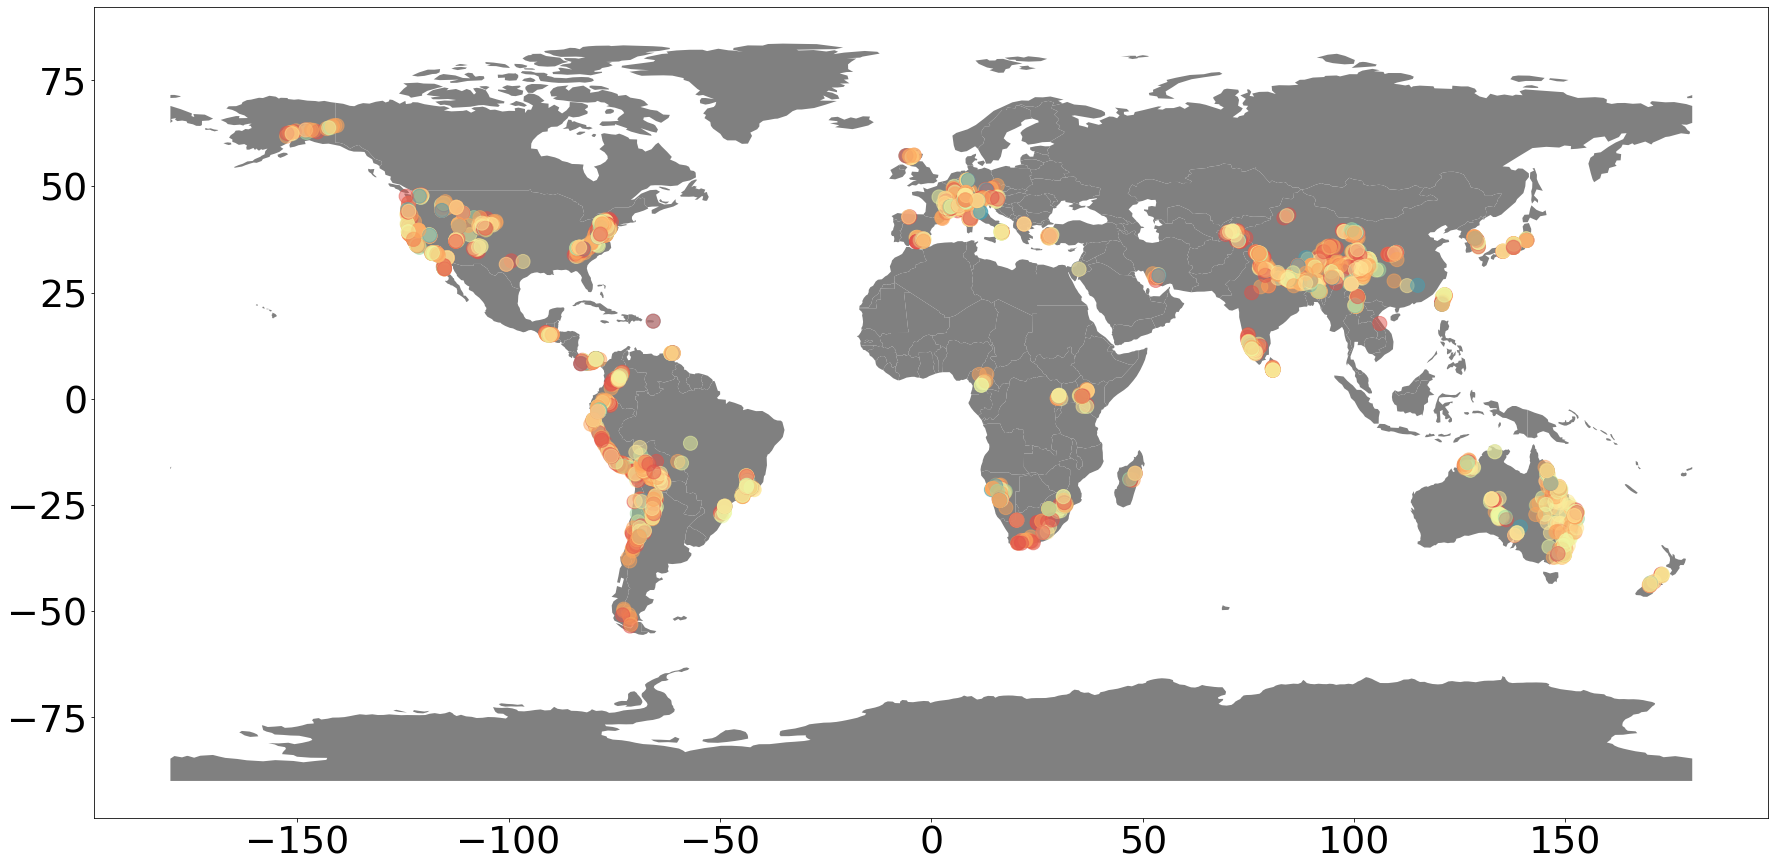

In [1295]:
from matplotlib.colors import ListedColormap
plt.rcParams.update({'font.size': 38})
fig,ax = plt.subplots(figsize=(30,15))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax,color='grey')
a['geo'] = a['meantempclass']
a2 = a.copy()
a2.geometry = a.geometry.centroid

a2 = a2[~a2['geo'].isna()]
a2.plot('geo',ax = ax,cmap = ListedColormap(sns.color_palette("Spectral").as_hex()[:7]),alpha=.5,s=200)
#plt.imshow(f)

In [1233]:
if 0:
#     lith = gpd.read_file('/users/gr_1/Downloads/LiMW_GIS 2015.gdb')
#     lith = lith.to_crs(a.crs)
    l = []
    c = a.centroid.geometry
    for t,i in enumerate(c):
        l.append(lith[lith.contains(i)]['xx'])
        print(t/len(a))

In [1025]:
#l1np.load('v2_geo_classes.npy',l)

In [1256]:
### load this for geo info (only when already subtract the other geo info)

l1 = np.load('v2_geo_classes.npy',allow_pickle=True)
if 1:
    io = []
    for i in range(len(a)):
        if len(l1[i].to_numpy())>0:
            io.append(l1[i].to_numpy()[0])
        else:
            io.append('Na')
    a['meantempclass'] = io

In [112]:
## tectonic regimes
if 0:
    a = gpd.read_file('/Users/gr_1/Documents/cosmo_predict/octo_327_data')

    t = gpd.read_file('/Users/gr_1/Documents/cosmo_predict/tectonic_region/')
    a['meantempclass'] = -1
    mt1 = np.zeros(len(a))
    for i in range(len(a)):
        try:
            mt1[i] = t.index[t.contains(a.geometry[i].centroid)][0]
        except:
            continue
    a['meantempclass'] = np.int32(mt1)

In [869]:
t.index = np.arange(len(t))
a.index = np.arange(len(a))
regions = t['region'][a['meantempclass']]
regions.index = np.arange(len(regions))
a['region'] = regions
a['id'] = range(len(a))

AttributeError: 'list' object attribute 'index' is read-only

In [870]:
## Unique cross-validation type thing
a.index = range(len(a))
a['meantempclass'] = pd.qcut(a.rank(method='first').x_wgs84,711,duplicates='drop')
a.index = range(len(a))

AttributeError: 'GeoDataFrame' object has no attribute 'x_wgs84'

In [871]:
c=0
a['id'] = range(len(a))
groups = np.zeros((1000,1000))
bslen=[]
for i,b in a.groupby('meantempclass'):
    for j in range(len(b)):
        groups[c,j] = np.int32(b.iloc[j]['id'])
    bslen.append(len(b))
    c+=1



In [872]:
m,n = np.shape(groups)
a['meantempclass'] =0
for i in range(0,m):
    for j in range(0,n):
        if groups[i,j] > 0:
            a['meantempclass'][groups[i,j]] = j
## end cross validation

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/1082925267.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['meantempclass'][groups[i,j]] = j
/Users/gr_1/opt/miniconda3/envs/ee/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [292]:
# import seaborn as sns
# plt.subplots(figsize=(10,7))
# sns.histplot(data=a,x='bio10',log_scale = False, hue='meantempclass')
# a = gpd.read_file('/Users/gr_1/Documents/cosmo_predict/octo_327_data')

In [1253]:
oldindex = a.index
a.index = range(len(a))

In [1254]:
#@jit(nopython=True)
#def loop_results(eros1, dfs,n,c):
r2o = r2s.copy()
n = 3553
nt = 1000
dfs = np.array([None]*len(eros1[12]))
              
c=0
for i in range(len(eros1[12])):
        dfs[i] = np.zeros(len(eros1))
        for k in range(1,len(eros1)):
            if (eros1[k] is None):
                continue
            else:
                dfs[i][k] = eros1[k][i]
            c+=1
    #return dfs

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2784831814.py:49: RuntimeWarning: invalid value encountered in log
  y = np.log(np.float64(a['ebe_mmkyr'.upper()][ids]) / 1000)
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2784831814.py:50: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][ids] *precip[ids].to_numpy()**(.5*ns[np.argmax(r2o)]))  ### need to change this mabe if not looking at lith
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2784831814.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['y_est2'][ids] = np.exp(y2)
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/2784831814.py:49: RuntimeWarning: invalid value encountered in log
  y = np.log(np.float64(a['ebe_mmkyr'.upper()][ids]) / 1000)
/var/folde

##
1.8416174047056464
-0.7215001412816499
##
##
1.7074413463785436
-0.5328443278311255
##
##
1.773156793409623
-0.47991728134882466
##
##
1.9907376634687377
-0.6832756459197196
##
##
1.7224933936392288
-0.5482065469785502
##
##
1.9382373456009834
-0.4872363517943851
##
##
1.8763464621528703
-0.6734373494933724
##
##
1.8491884797569829
-0.6438534414441929
##
##
1.861013934824211
-0.8284523567407297
##
##
2.0412653319004574
-0.7065798933612578
##
##
1.8581890335146662
-0.6840995967713916
##


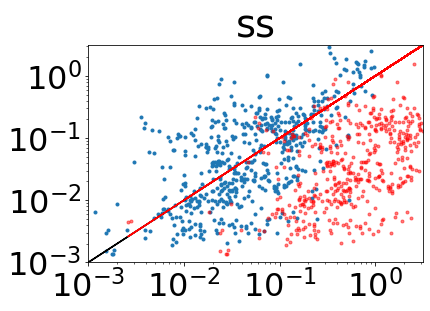

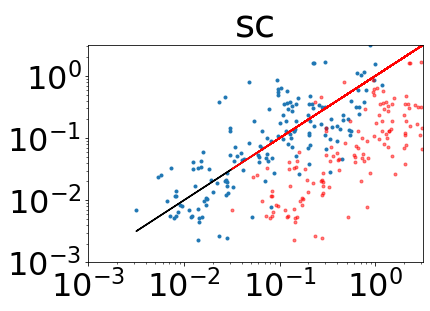

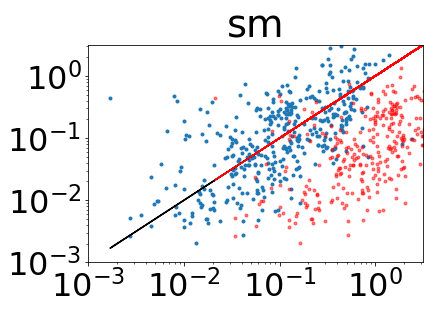

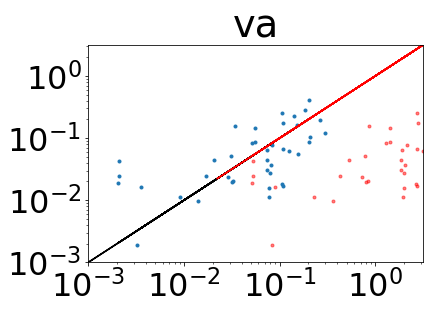

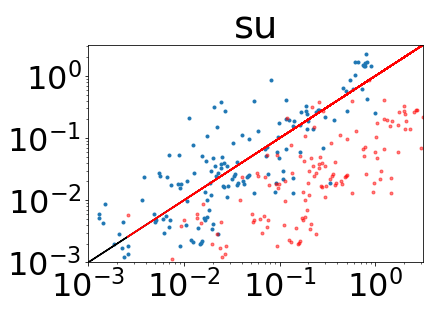

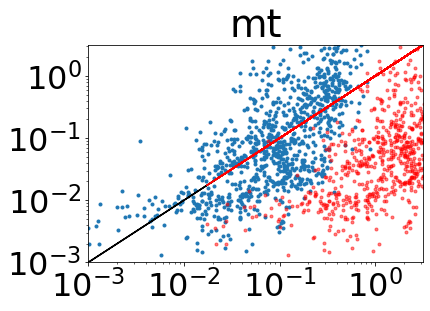

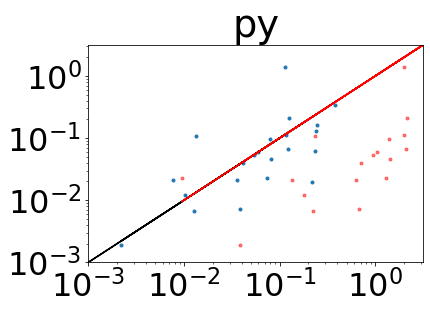

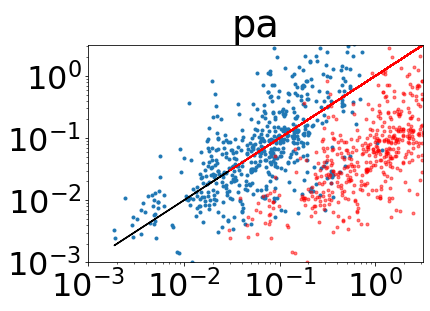

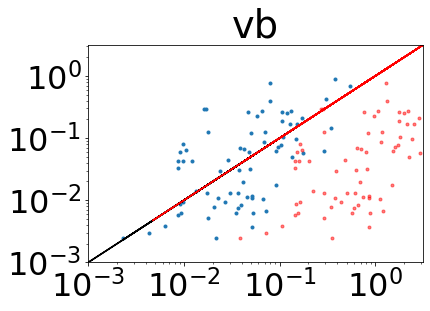

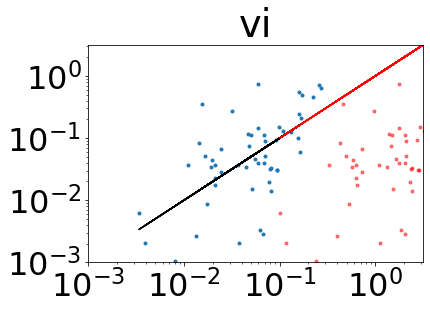

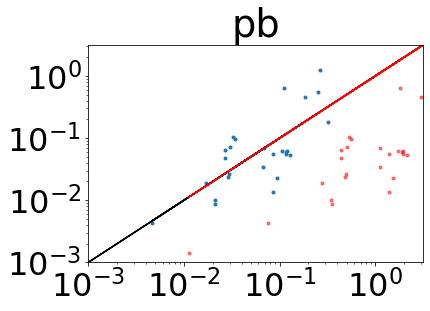

In [1284]:
from sklearn import linear_model as lm
import sklearn
n = 0
a['y_est2'] = 0
#r2o = r2s
r2s = [None] * len(a['meantempclass'].unique())
mntemp = np.zeros(len(r2s))
abox = pd.DataFrame()
abox['index'] = np.arange(len(eros1[12])*len(a['meantempclass'].unique()))
abox['index'] = np.arange(len(eros1[12])*len(a['meantempclass'].unique()))

abox['r2s'] = 0
abox['drat'] = 0
abox['n'] = 0
abox['m/n'] = 0
abox['class'] = 0
abox['drat'] = 0
abox['dratave'] = 0
abox['pcoef_d'] = 0
superscript = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")

mt = a['meantempclass'].unique()
# try:
#     if intercepts >0:
#         intercepts/=c
# except:
#     intercepts=0
c=0
intercepts = 0
for li in range(len(a['meantempclass'].unique())):
    ids = a.index[a['meantempclass'] == a['meantempclass'].unique()[li]]
    
    r2s[li] = np.zeros(len(eros1[12]))
    pcoef_d = np.zeros(len(eros1[12]))
    resid = np.zeros(len(eros1[12]))
    pcoef = np.zeros(len(eros1[12]))
    ks2 = ns.copy()#ks.copy()
    diffus2 = diffus.copy()
    try:
        mntemp[li] = np.mean(a['bio12'][ids])
    except:
        'meh'
    for i in [np.argsort(r2o)[-1]]:#range(len(eros1[12])):#range(len(ms)):
            if dfs[i][ids] is None:
                continue
                        
            precip = a['bio12']
            #print(len(ids))
            y = np.log(np.float64(a['ebe_mmkyr'.upper()][ids]) / 1000)
            x = np.log(dfs[i][ids] *precip[ids].to_numpy()**(.5*ns[np.argmax(r2o)]))  ### need to change this mabe if not looking at lith
            #np.log(y) - np.log(x)
            #I_min = np.where(a['slp_ave'][:n]/1000>1e-1)[0]
            #x=x[I_min]
            #y=y[I_min]
            xi = x.copy()
            I = np.where(np.logical_or(np.isnan(x),np.isinf(x)))[0]
            x=np.delete(x,I)
            y=np.delete(y,I)
            ids = np.delete(ids,I)
            I2 = np.where(np.logical_or(np.isnan(y),np.isnan(x)))[0]
            x = np.delete(x,I2)
            y = np.delete(y,I2)
            ids = np.delete(ids,I2)
            
            
            l1  = lm.LinearRegression(fit_intercept=False)
            l = lm.LinearRegression(fit_intercept=False)
            if len(x[np.logical_not(np.isnan(x))])>20:
                
                    #print(a.loc[ids[0],'meantempclass'])
                    p1 = l1.fit(np.exp(x.reshape(-1,1)),np.exp(y.reshape(-1,1)))
                    p = l.fit(x.reshape(-1,1), y.reshape(-1,1))
                    intercept =np.mean( y - x )
                    y2 = x + intercept
                    print('##')
                    print(intercept/intercepts2)
                  #  ####
                   # if 1:
                       # x = x[ y2 > -4 ]

                       # y = y[ y2 > -4 ]
                       # y2 = y2[y2>-4]
                    ####
                    #
                    y3 = np.exp(x) * np.exp(intercept)#p1.predict(np.exp(x.reshape(-1,1)))
                    r2s[li][i] = sklearn.metrics.r2_score(y.reshape(-1,1),y2)
                    #
                    diffus2[i] *= p1.coef_
                    #
                    resid[i] = np.mean(np.abs(np.exp(y.ravel())-y3.ravel()))
                    #
                    pcoef[i] = p.coef_
                    
                    #print('l='+str(len(x[x>0])))

                    r2 = (y2 - y) ** 2
                    plt.figure()
                    print(pcoef[i])
                    plt.plot(np.exp(y2),np.exp(y),'.')
                    plt.plot(np.exp(y2),np.exp(y2),'k')
                    try:
                        plt.plot(np.exp(x + intercepts2),np.exp(y),'.r',alpha=.5)

                        plt.plot(np.exp(x + intercepts2),np.exp(x+ intercepts2),'r')
                    except:
                        'here'
                    plt.yscale('log')
                    plt.xscale('log')
                    plt.title(a['meantempclass'].unique()[li])
                    
                    pcoef_d[i] = np.exp(intercept)  *  np.exp(np.sum(r2)/2 / (len(r2)))
                    #if 
                    abox.loc[c,'r2s'] = r2s[li][i]
                    abox.loc[c,'meantempclass'] = a['meantempclass'].unique()[li]#li#  - you can change this if numerical etc.
                    #abox.loc[c,'meantempclass'] = li
                    abox.loc[c,'class'] = mt[li]
                    a['y_est2'][ids] = np.exp(y2)
                    abox.loc[c,'n'] = ns[i]
                    plt.ylim([10**-3,10**.5])
                    plt.xlim([10**-3,10**.5])
                    print('##')
                    abox.loc[c,'Diffusion/total'] = dratave[i] 
                    abox.loc[c,'m/n'] = ms[i] / ns[i]
                    abox.loc[c,'k'] = pcoef_d[i] #/ mntemp[li]
                    abox.loc[c,'D/k'] = diffus[i]/1e-8# Now by multiplying, it is just D
                    intercepts+=intercept
                    c=c+1
intercepts2=intercepts/(c)

In [139]:
# g30['model'] = 'n=2, D/k=5.0 10⁶'
# g40['model'] = 'n=1.0, D/k=0'
# g_2 = g40.append(g30)

In [1290]:
abox[:12]

index       r2s  drat         n       m/n class  dratave  pcoef_d  \
0       0  0.343991     0  1.902816  0.705421    ss        0        0   
1       1  0.579009     0  1.902816  0.705421    sc        0        0   
2       2  0.402485     0  1.902816  0.705421    sm        0        0   
3       3  0.233706     0  1.902816  0.705421    va        0        0   
4       4  0.671503     0  1.902816  0.705421    su        0        0   
5       5  0.456363     0  1.902816  0.705421    mt        0        0   
6       6  0.116716     0  1.902816  0.705421    py        0        0   
7       7  0.420318     0  1.902816  0.705421    pa        0        0   
8       8  0.369201     0  1.902816  0.705421    vb        0        0   
9       9  0.346478     0  1.902816  0.705421    vi        0        0   
10     10  0.628552     0  1.902816  0.705421    pb        0        0   
11     11  0.000000     0  0.000000  0.000000     0        0        0   

   meantempclass  Diffusion/total         k           D/k  
0             ss              0.0  0.006414  1.513170e+08  
1             sc              0.0  0.006614  1.513170e+08  
2             sm              0.0  0.006509  1.513170e+08  
3             va              0.0  0.002762  1.513170e+08  
4             su              0.0  0.007259  1.513170e+08  
5             mt              0.0  0.004490  1.513170e+08  
6             py              0.0  0.005194  1.513170e+08  
7             pa              0.0  0.005171  1.513170e+08  
8             vb              0.0  0.005133  1.513170e+08  
9             vi              0.0  0.002848  1.513170e+08  
10            pb              0.0  0.003510  1.513170e+08  
11           NaN              NaN       NaN           NaN

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_3862/339998429.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abox['Precip'][:N] = mn


<AxesSubplot:label='95538bd7-06d8-4dfb-b501-2273a1b25f50', xlabel='Precip', ylabel='r2s'>

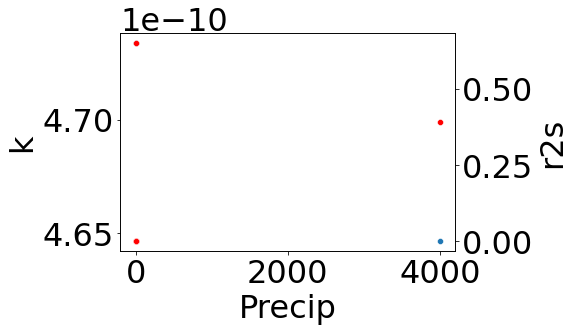

In [1192]:
N=10
mn= np.zeros(N)+np.nan
for i in range(N):
    try:
        mn[i] = abox['meantempclass'][i].left/2 + abox['meantempclass'][i].right/2
    except:
        continue
mn[-1] = 4000
abox['Precip'] =0
abox['Precip'][:N] = mn
sns.scatterplot(data=abox,x='Precip',y='k')
ax = plt.twinx()
sns.scatterplot(data=abox,x='Precip',y='r2s',color='r')

In [ ]:
N=6
mn= np.zeros(N)+np.nan
for i in range(N):
    try:
        mn[i] = abox['meantempclass'][i].left/2 + abox['meantempclass'][i].right/2
    except:
        continue
mn[-1] = 4000
abox['Precip'] =0
abox['Precip'][:N] = mn
sns.scatterplot(data=abox,x='Precip',y='k')
ax = plt.twinx()
sns.scatterplot(data=abox,x='Precip',y='r2s',color='r')

<AxesSubplot:xlabel='$E_{estimated}$', ylabel='$E_{apparent}$'>

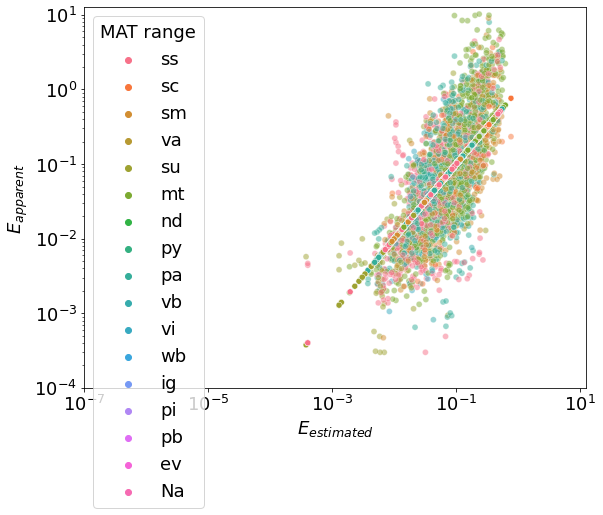

In [1032]:

plt.rcParams.update({'font.size': 18})
plt.subplots(figsize=(9,7))
a['$E_{apparent}$'] = a['ebe_mmkyr'.upper()]/1000
a['$E_{estimated}$'] = a['y_est2']
a['MAT range'] = a['meantempclass']
sns.scatterplot(data=a, y='$E_{apparent}$', x='$E_{estimated}$', hue='MAT range', alpha=.5)
plt.xscale('log')
plt.yscale('log')
plt.ylim([10**-4, 10**1.1])
plt.xlim([10**-7, 10**1.1])
sns.scatterplot(data=a, y='$E_{estimated}$', x='$E_{estimated}$', hue='MAT range', legend=False)

AttributeError: 'int' object has no attribute 'left'

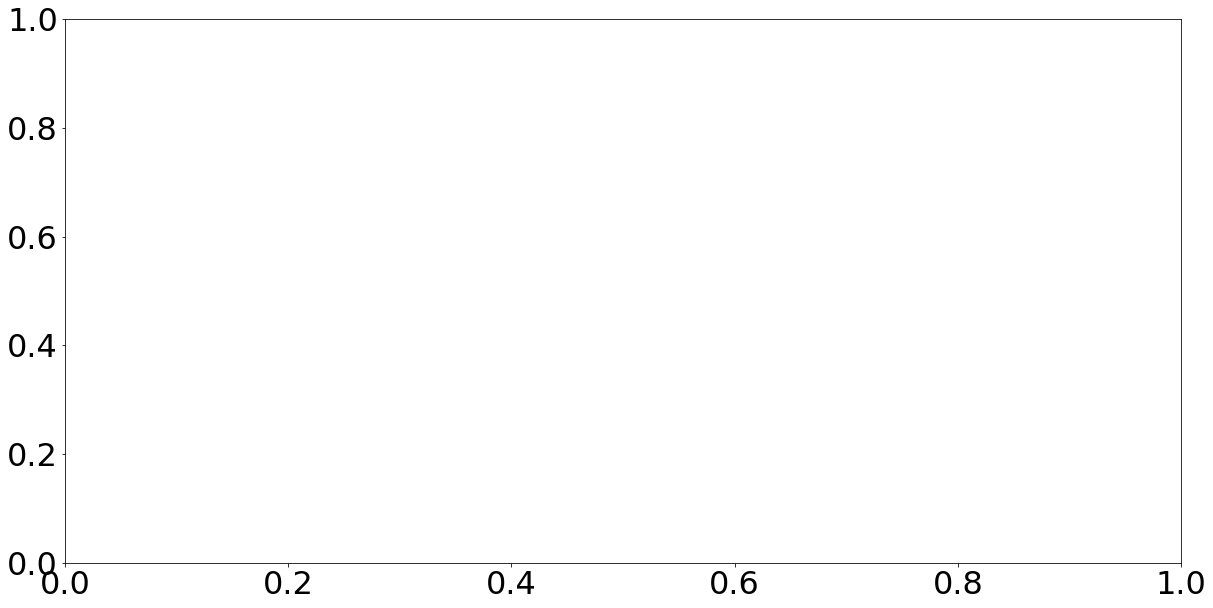

In [1285]:
## precip
abox.index = range(len(abox))
fig,ax = plt.subplots(figsize=(20,10))
plt.rcParams.update({'font.size': 32})
valy = 'k'
classes = ['Mixed Sedimentary','Metamorphic / plutonic','Plutonic','Volcanic',
 'Mixed sed/volcanic','Unclassified','Ice cap','Melang/schist or tectonite belt']
r = abox['class']
if 0:
    abox['classnm'] = np.nan
    abox['classnm'][r == 146] = classes[0]
    abox['classnm'][r == 167] = classes[1]
    abox['classnm'][r == 252] = classes[2]
    abox['classnm'][r == 255] = classes[3]
    abox['classnm'][r == 96] = classes[4]
    abox['classnm'][r == 253] = classes[5]
    abox['classnm'][r == 176] = classes[6]
    abox['classnm'][r == 187] = classes[7]
#a['maxr2'] = dfs[np.argmax(r2s)][:len(a)] * np.exp(pcoef[np.argmax(r2s)])
#abox['classnm'] = r
property1 = 'class'
g2 = pd.DataFrame()
for i,g in abox.groupby('class'):
    g['rbin'] = pd.qcut(g['r2s'],[.95,1])
    g['rbin2'] = pd.qcut(g['r2s'],[.99999,1])
    g2 = g2.append(g)
    #print(str(g['class'].iloc[0]) + ' ' + str(g.iloc[np.argmax(g['r2s'])]['Diffusion/total']))

g3 = g2[~g2['rbin2'].isna()]
g3[property1] = g3['class']
g3['r'+'2'.translate(superscript)] = g3['r2s']
g3['r²'] = np.round(g3['r²'], 2)
g3['k'] = (g3['k'])
g3['log(D/k)'] = np.log10(g3['D/k'])
#ax2 =sns.violinplot(data=g3,x=property1,y=valy,c='Spectral')

cs = [sns.color_palette('Spectral').as_hex()[i] for i in [0,1,2,4,5]]

g3 = g2[~g2['rbin'].isna()]
g3['r'+'2'.translate(superscript)] = g3['r2s']
g3['r²'] = np.round(g3['r²'],2)
g3['log(D/k)'] = np.log10(g3['D/k'])
g2['log(D/k)'] = np.log10(g2['D/k'])
g2['k'] = g2['k']

g3['n'] = g3['n']

#g3[property1] = g3['classnm']
g3.index = range(len(g3))
if 1:#'Precip' in property1:
    g3['Precip range (mm/yr)'] = ''
    for i in range(len(g3)):
        g3.loc[i,'Precip range (mm/yr)'] = str(int(g3.loc[i,property1].left+1)) + ' - ' + str(int(g3.loc[i,property1].right))
    property1 = 'Precip range (mm/yr)'

sns.scatterplot(data=g30, x=property1, y=valy,palette=cs)
ax2 = plt.twinx()
sns.scatterplot(data=g40, x=property1, y=valy,palette=cs)

#plt.yscale('log')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
#ax.set_xticklabels('')
#plt.ylim([-10,-5])
#plt.ylim([0,1.2])
#plt.plot([.1,.1],[.2,.2])

In [ ]:
plt.scatter(a[''])

AttributeError: 'int' object has no attribute 'right'

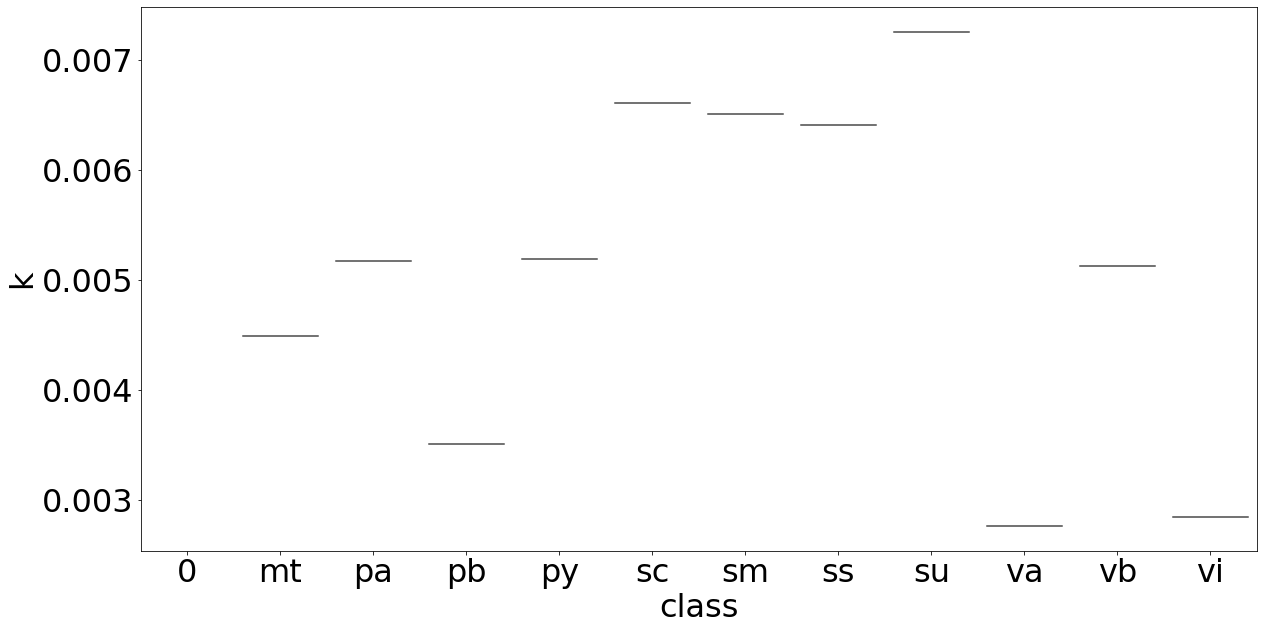

In [1286]:
## precip
abox.index = range(len(abox))
fig,ax = plt.subplots(figsize=(20,10))
plt.rcParams.update({'font.size': 32})
valy = 'k'
classes = ['Mixed Sedimentary','Metamorphic / plutonic','Plutonic','Volcanic',
 'Mixed sed/volcanic','Unclassified','Ice cap','Melang/schist or tectonite belt']
r = abox['class']
if 0:
    abox['classnm'] = np.nan
    abox['classnm'][r == 146] = classes[0]
    abox['classnm'][r == 167] = classes[1]
    abox['classnm'][r == 252] = classes[2]
    abox['classnm'][r == 255] = classes[3]
    abox['classnm'][r == 96] = classes[4]
    abox['classnm'][r == 253] = classes[5]
    abox['classnm'][r == 176] = classes[6]
    abox['classnm'][r == 187] = classes[7]
#a['maxr2'] = dfs[np.argmax(r2s)][:len(a)] * np.exp(pcoef[np.argmax(r2s)])
#abox['classnm'] = r
property1 = 'class'
g2 = pd.DataFrame()
for i,g in abox.groupby('class'):
    g['rbin'] = pd.qcut(g['r2s'],[.95,1])
    g['rbin2'] = pd.qcut(g['r2s'],[.99999,1])
    g2 = g2.append(g)
    #print(str(g['class'].iloc[0]) + ' ' + str(g.iloc[np.argmax(g['r2s'])]['Diffusion/total']))

g3 = g2[~g2['rbin2'].isna()]
g3[property1] = g3['class']
g3['r'+'2'.translate(superscript)] = g3['r2s']
g3['r²'] = np.round(g3['r²'], 2)
g3['k'] = (g3['k'])
g3['log(D/k)'] = np.log10(g3['D/k'])
#print(g3['n'])
ax2 =sns.violinplot(data=g3,x=property1,y=valy,c='Spectral')

cs = [sns.color_palette('Spectral').as_hex()[i] for i in [0,1,2,4,5]]

g3 = g2[~g2['rbin'].isna()]
g3['r'+'2'.translate(superscript)] = g3['r2s']
g3['r²'] = np.round(g3['r²'],2)
g3['log(D/k)'] = np.log10(g3['D/k'])
g2['log(D/k)'] = np.log10(g2['D/k'])
g2['k'] = g2['k']
g3['n'] = g3['n']
#g3[property1] = g3['classnm']
g3.index = range(len(g3))
if 1:#'Precip' in property1:
    g3['Precip range (mm/yr)'] = ''
    for i in range(len(g3)):
        g3.loc[i,'Precip range (mm/yr)'] = str(int(g3.loc[i,property1]+1)) + ' - ' + str(int(g3.loc[i,property1].right))
    property1 = 'Precip range (mm/yr)'
#sns.violinplot(data=g3,x=property1, y=valy,palette=cs)
plt.yscale('log')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
#ax.set_xticklabels('')
#plt.ylim([-10,-5])
#plt.ylim([0,1.2])
#plt.plot([.1,.1],[.2,.2])


0 nan
sc 0.0
sm 0.0
ss 0.0


[Text(0, 0, '0'), Text(1, 0, 'sc'), Text(2, 0, 'sm'), Text(3, 0, 'ss')]

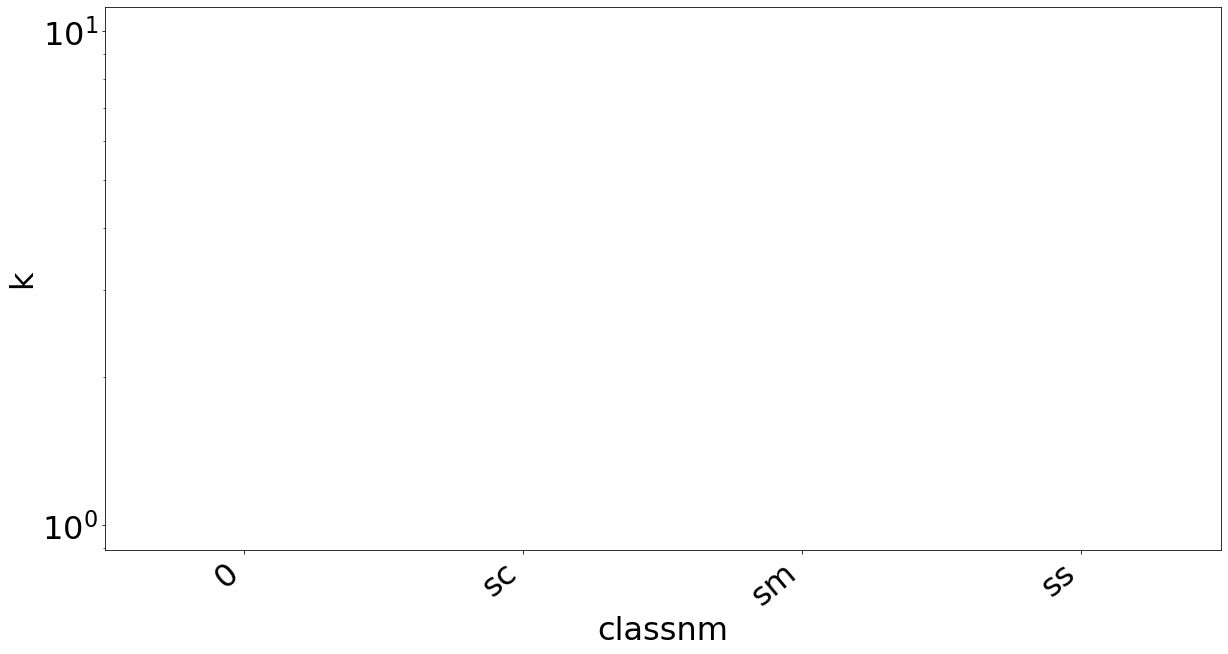

In [1186]:
## lithology
abox.index = range(len(abox))
fig,ax = plt.subplots(figsize=(20,10))
plt.rcParams.update({'font.size': 32})
valy = 'k'
classes = ['Mixed Sedimentary','Metamorphic / plutonic','Plutonic','Volcanic',
 'Mixed sed/volcanic','Unclassified','Ice cap','Melang/schist or tectonite belt']
r = abox['class']
if 0:
    abox['classnm'] = np.nan
    abox['classnm'][r == 146] = classes[0]
    abox['classnm'][r == 167] = classes[1]
    abox['classnm'][r == 252] = classes[2]
    abox['classnm'][r == 255] = classes[3]
    abox['classnm'][r == 96] = classes[4]
    abox['classnm'][r == 253] = classes[5]
    abox['classnm'][r == 176] = classes[6]
    abox['classnm'][r == 187] = classes[7]
abox['classnm'] = abox['meantempclass']
#a['maxr2'] = dfs[np.argmax(r2s)][:len(a)] * np.exp(pcoef[np.argmax(r2s)])
#abox['classnm'] = r
property1 = 'classnm'
g2 = pd.DataFrame()
for i,g in abox.groupby('class'):
    g['rbin'] = pd.qcut(g['r2s'],[.95,1])
    g['rbin2'] = pd.qcut(g['r2s'],[.9999,1])
    g2 = g2.append(g)
    print(str(g['class'].iloc[0]) + ' ' + str(g.iloc[np.argmax(g['r2s'])]['Diffusion/total']))

g3 = g2[~g2['rbin2'].isna()]
g3[property1] = g3['class']
g3['r'+'2'.translate(superscript)] = g3['r2s']
g3['r²'] = np.round(g3['r²'],2)
g3['k'] = (g3['k'])
g3['log(D/k)'] = (g3['D/k'])
#print(g3['n'])
ax2 =sns.violinplot(data=g3,x=property1,y=valy,c='Spectral')

cs = [sns.color_palette('Spectral').as_hex()[i] for i in [0,1,2,4,5]]

g3 = g2[~g2['rbin'].isna()]
g3['r'+'2'.translate(superscript)] = g3['r2s']
g3['r²'] = np.round(g3['r²'],2)
g3['log(D/k)'] = np.log10(g3['D/k'])
g2['log(D/k)'] = np.log10(g2['D/k'])
g3['k'] = (g3['k'])
#g2['k'] = np.log10(g2['k'])

g3['n'] = g3['n']

g3[property1] = g3['class']
g3.index = range(len(g3))
#plt.ylim((.000005,.00002))
sns.violinplot(data=g3,x=property1, y=valy,palette=cs)
plt.yscale('log')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
#ax.set_xticklabels('')
#plt.ylim([-10,-5])
#plt.ylim([10,6])
#plt.plot([.1,.1],[.2,.2])

In [752]:
np.max(r2s)

0.5367103614229618

IndexError: index 5 is out of bounds for axis 0 with size 5

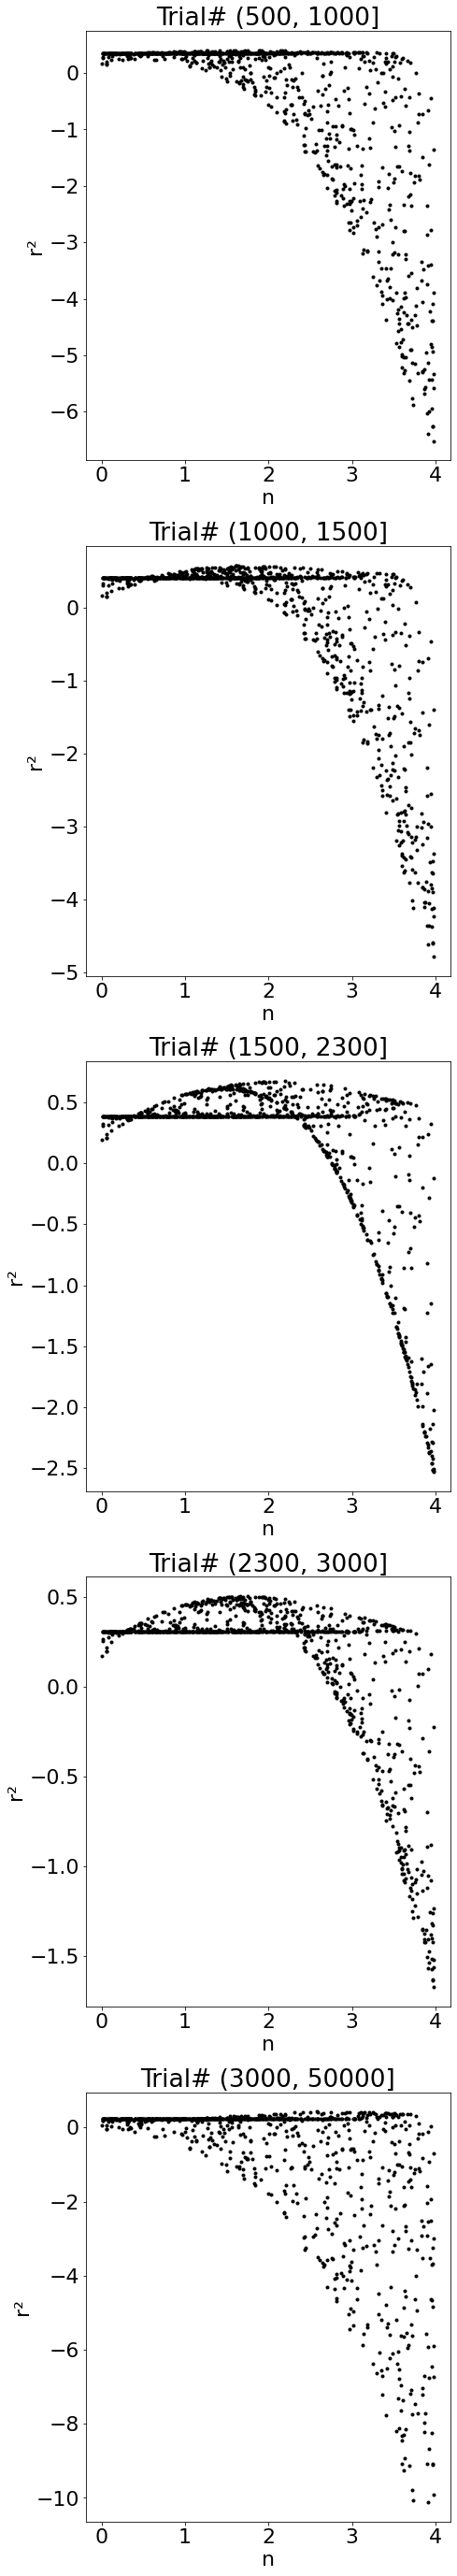

In [303]:
#plt.plot((ns),r2s[3],'.')
#plt.ylim((0,.5))
plt.rcParams.update({'font.size': 22})
fig,ax = plt.subplots(5,1,figsize=(7,7*7))

mt = a['meantempclass'].unique()
try:
    codes = mt.codes
except:
    codes = range(len(mt))#range(max(a['meantempclass']))

lo = np.zeros(len(codes))
r2max = np.zeros(len(codes))
superscript = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")
lox = np.zeros(len(codes))
abox.index = abox['class']
varnm = 'n'
c = 0;
for i in range(len(codes)):
    if mt[codes[i]] is None:
        continue
    
    var = g2.loc[g2['class'] == mt[codes[i]]][varnm].to_numpy()
    #var.index = np.range(len(var))
    plt.sca(ax[c])
    try:
        lox[i] = mt[i].left

    except:
        try:
            lox[i] = codes[i]#codes[i][0].left#lens[i]
        except:
            continue
    plt.plot(var,r2s[i], '.k')
    #plt.ylim([.2, .7])
    lo[i] = var[np.argmax(r2s[i])]
    r2max[i] = np.max(r2s[i])
    plt.xlabel('D/k')
    #plt.xscale('log')
    try:
        #lith
        #plt.title(g2.loc[g2['class'] == mt[codes[i]]]['classnm'].iloc[0])
        #precip
        #plt.title('Precip = ' +str(mt[codes[i]]))
        #x - validation
        plt.title('Trial# ' +str(mt[codes[i]+1]))

    except:
        continue
    #plt.xlabel('E' + 'diffusion'.translate(subscript) + '/' 'E' + 'total'.translate(subscript))
    plt.xlabel(varnm)
    plt.ylabel('r'+'2'.translate(superscript))
    #plt.xlabel(t.loc[codes[i],'region'])
    c+=1
fig,ax = plt.subplots(figsize=(7,7))

# for i in range(len(a['meantempclass'].unique())):
#     fig,ax = plt.subplots(figsize=(7,7))
#     plt.hist(ns[r2s[l]>.3], kde=True)

plt.scatter(lox[r2max>-.3],lo[r2max>-.3],c=mntemp[r2max>-.3], s=50)
#plt.scatter(lo[r2max>.3],r2max[r2max>.3],c='k',s=50)

#plt.yscale('log')
plt.xlabel ('Trial#')
plt.ylabel (varnm)
#plt.ylabel('r' + '2'.translate(superscript))
#plt.ylim((0,4))
#plt.xscale('log')

In [ ]:
plt.plot(a['maxr2'][a['meantempclass']==13],a['ebe_mmkyr'][a['meantempclass'] == 13]/1000,'.')
plt.xscale('log')
plt.yscale('log')

In [ ]:
a1 = a[a['meantempclass'] == 1]
fig,ax = plt.subplots(figsize=(10,10))
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).plot(ax=ax,alpha=.5)
a1.geometry = a1.centroid
a1.plot(color='r',ax=ax)
len(a1)


NameError: name 'slps1' is not defined

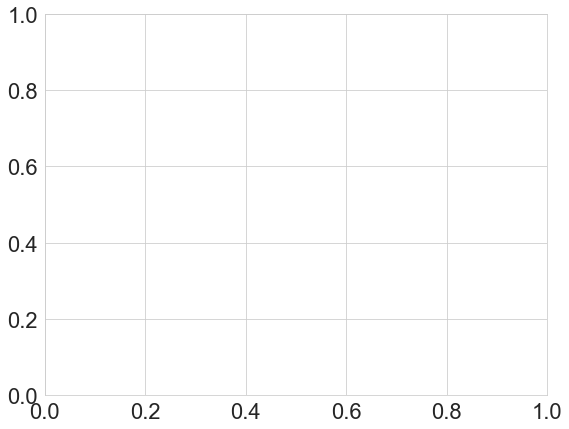

In [222]:
plt.subplots(figsize=(9,7))
plt.plot(slps1[:len(a)], a['ebe_mmkyr']/1000,'.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('D8 average slope')
plt.ylabel('Basin avg. Erosion rate (mm/yr)')
y = np.log(np.float64(a['ebe_mmkyr'])/1000)
x = np.log(slps1[:len(a)])
#I_min = np.where(a['slp_ave'][:n]/1000>1e-1)[0]
#x=x[I_min]
#y=y[I_min]
I = np.where(np.logical_or(np.isnan(x),np.isinf(x)))[0]
x=np.delete(x,I)
y=np.delete(y,I)
I2 = np.where(np.logical_or(np.isnan(y),np.isinf(y)))[0]
x=np.delete(x,I2)
y=np.delete(y,I2)



l1  = lm.LinearRegression(fit_intercept=False)
l1 = l1.fit(x.reshape(-1,1),y.reshape(-1,1))
x2 = np.log(np.linspace(10**-2,10**0,100).reshape(-1,1))
y2 = l1.predict(x2)
plt.plot(np.exp(x2),np.exp(y2),'k',linewidth=3)
y3 = l1.predict((x.reshape(-1,1)))
r2 = sklearn.metrics.r2_score(y.reshape(-1,1),y3.reshape(-1,1))
plt.text(10**-2.2,10**-2.82,'r' +'2'.translate(superscript) + ' = {} '.format(str(np.round(r2,2))),rotation=27)
plt.text(10**-2.2,10**-2.3,'slope'+ ' = {} '.format(str(np.round(l1.coef_[0][0],1))),rotation=27)


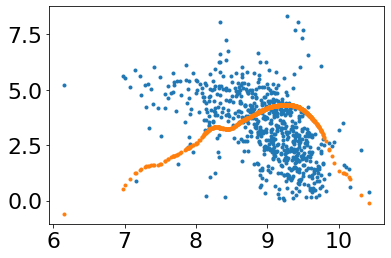

In [149]:
from numpy import array, linspace
from sklearn.neighbors import KernelDensity
from matplotlib.pyplot import plot
diff = np.abs(y3.reshape(-1,1)-y.reshape(-1,1))
lens = np.array(list(range(len(diff))))
kde = KernelDensity(kernel='gaussian', bandwidth=.1).fit(x.reshape([-1,1]),diff.reshape([-1,1]))
s = kde.score_samples(x.reshape(-1,1))
plt.plot(x,diff,'.')
plt.plot(x,s+4.5,'.')


In [150]:
a['meantempclass'] = 0
a['meantempclass'][a.index[np.logical_and(a.geometry.centroid.y>20,a.geometry.centroid.x<-50)]] = 2# East coast
a['meantempclass'][a.index[a.geometry.centroid.x<-90]] = 3# West coast
a['meantempclass'][a.index[np.logical_and(a.geometry.centroid.x>100,a.geometry.centroid.y<0)]] = 4

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_4279/2246413936.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  a['meantempclass'][a.index[np.logical_and(a.geometry.centroid.y>20,a.geometry.centroid.x<-50)]] = 2# East coast
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_4279/2246413936.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  a['meantempclass'][a.index[np.logical_and(a.geometry.centroid.y>20,a.geometry.centroid.x<-50)]] = 2# East coast
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_4279/2246413936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pan

/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_4279/1975516294.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  b.geometry = b.geometry.centroid


KeyError: 'meantempclass'

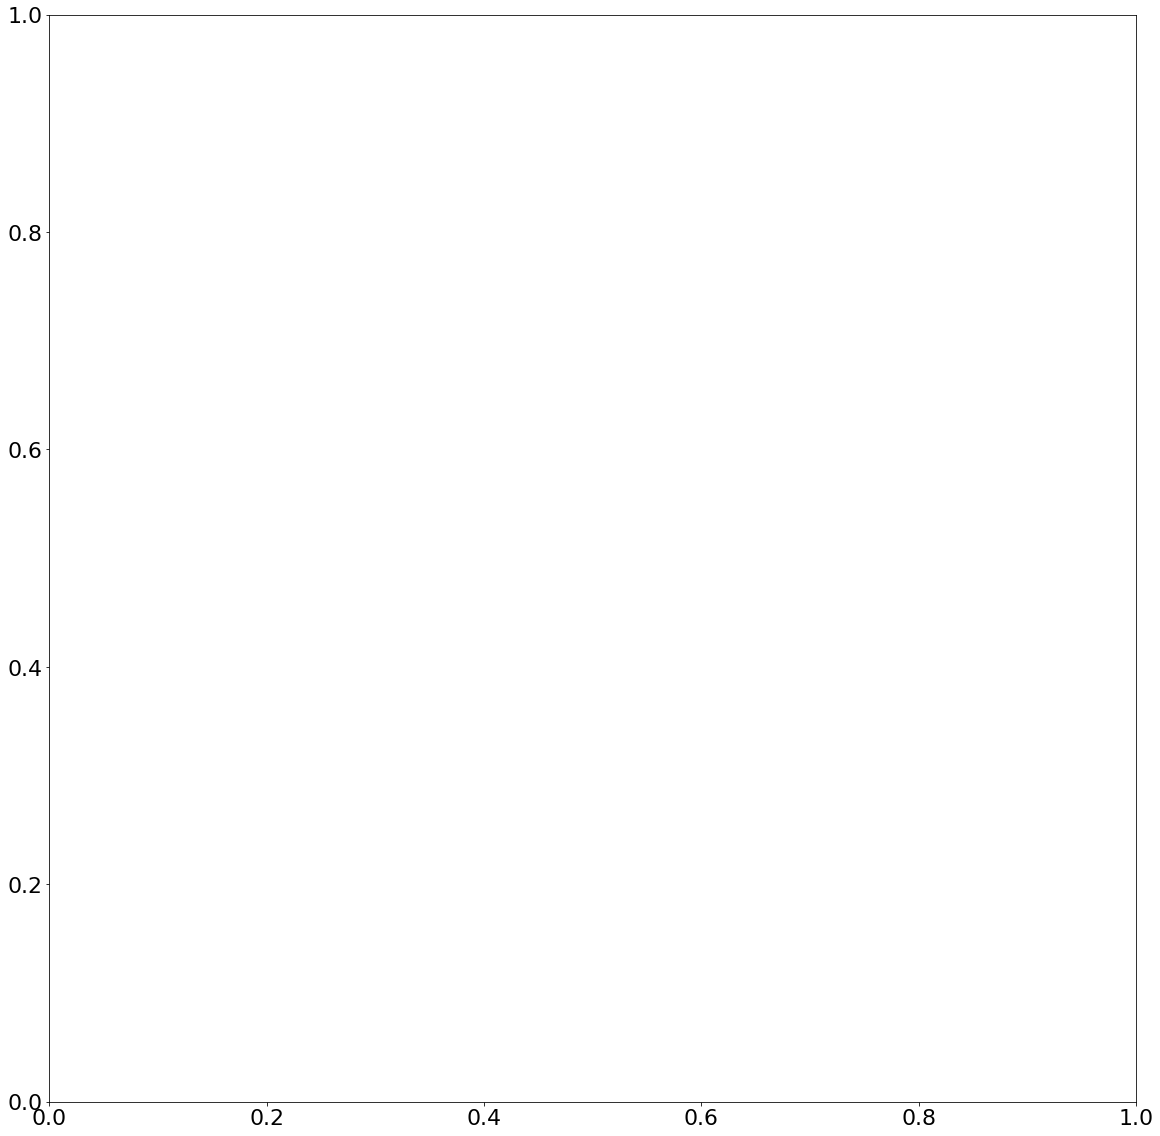

In [765]:
#a['binval'] = [a['meantempclass'][i].left for i in range(len(a))]

fig,ax = plt.subplots(figsize=(20,20))
b = a.copy()
b.geometry = b.geometry.centroid
b.plot(column='meantempclass',ax=ax,vmin=-1,vmax=20,cmap='jet', s = 1)

In [1103]:
l1 =[]
for i in range(len(dfs)):
    l1.append(len(dfs[i][dfs[i]>.00001]))
l1 = np.array(l1)

2.9270160438535517e-08

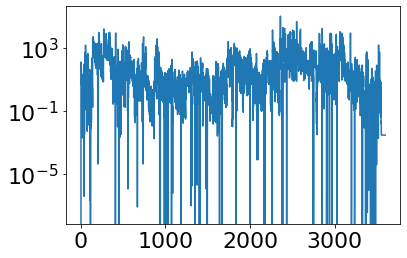

In [1104]:
plt.plot(dfs[100])
plt.yscale('log')
np.min(dfs[100][dfs[100]>0])

## I copied over parts of the diffusion notebook here

In [223]:
folder = 'results/dn_only///'
ns = np.load('{}/ns.npy'.format(folder),allow_pickle=True)
ms = np.load('{}/ms.npy'.format(folder),allow_pickle=True)
diffus = np.load('{}/diffu.npy'.format(folder),allow_pickle=True)
Gs = np.load('{}/Gs.npy'.format(folder),allow_pickle=True)
eros1 = np.load('{}/eros.npy'.format(folder),allow_pickle=True)
ks = np.load('{}/ks.npy'.format(folder),allow_pickle=True)
careas = np.load('{}/careas.npy'.format(folder),allow_pickle=True)



In [224]:
eros1=eros1[a.index]

In [225]:
for i in range(len(eros1)):
    if not((eros1[i] is None)):
        eros1[i] = np.array(eros1[i])
        eros1[i][0] = eros1[i][9]# Need too change this depending ...
        

In [226]:
#@jit(nopython=True)
#def loop_results(eros1, dfs,n,c):
n = 3553
nt = 1000
dfs = np.array([None]*len(eros1[1]))
              
c=0
for i in range(len(eros1[1])):
        dfs[i] = np.zeros(len(eros1))
        for k in range(1,len(eros1)):
            if (eros1[k] is None):
                continue
            else:
                dfs[i][k] = eros1[k][i]
            c+=1
    #return dfs
dfs_d = dfs.copy()

In [227]:
folder = 'results/r_mn05_6/'
ns = np.load('{}/ns.npy'.format(folder),allow_pickle=True)
ms = np.load('{}/ms.npy'.format(folder),allow_pickle=True)
diffus = np.load('{}/diffu.npy'.format(folder),allow_pickle=True)
Gs = np.load('{}/Gs.npy'.format(folder),allow_pickle=True)
eros1 = np.load('{}/eros.npy'.format(folder),allow_pickle=True)
ks = np.load('{}/ks.npy'.format(folder),allow_pickle=True)
careas = np.load('{}/careas.npy'.format(folder),allow_pickle=True)

In [228]:
## 19 is loc for ds = 2, only for this specific case

eros1 = eros1[a.index]


In [229]:
#@jit(nopython=True)
#def loop_results(eros1, dfs,n,c):
n = 3553
nt = 1000
dfs = np.array([None]*len(eros1[1]))
drat = np.array([None]*len(eros1[1]))
            
c=0
for i in range(len(eros1[1])):
        dfs[i] = np.zeros(len(eros1))
        drat[i] = np.zeros(len(eros1))

        for k in range(1,len(eros1)):
            if (eros1[k] is None):
                continue
            else:
                dfs[i][k] = eros1[k][i] #- dfs_d[0][k]* diffus[i]/.01
                #dfs[i][k] = dfs[i][k] + dfs_d[0][k]*200
                drat[i][k] = (dfs_d[0][k] * diffus[i] ) / eros1[k][i] 
            c+=1
    #return dfs


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_74321/1747009988.py:19: RuntimeWarning: invalid value encountered in double_scalars
  drat[i][k] = (dfs_d[0][k] * diffus[i] ) / eros1[k][i]


In [230]:
from sklearn import linear_model as lm
import sklearn
r2s = np.zeros(len(eros1[1]))
resid = np.zeros(len(eros1[1]))
pcoef = np.zeros(len(eros1[1]))
dratave = np.zeros(len(eros1[1]))

ks2 = ns.copy()#ks.copy()
diffus2 = diffus.copy()
badn = []
for i in range(len(eros1[1])):#range(len(ms)):
        if dfs[i] is None:
            continue
        
        y = np.log(np.float64(a['ebe_mmkyr'])/1000)
        x = np.log(dfs[i][:len(a)])
        #I_min = np.where(a['slp_ave'][:n]/1000>1e-1)[0]
        #x=x[I_min]
        #y=y[I_min]
        xi = x.copy()
        I = np.where(np.logical_or(np.isnan(x),np.isinf(x)))[0]
        x=np.delete(x,I)
        y=np.delete(y,I)
        I2 = np.where(np.logical_or(np.isnan(y),np.isnan(x)))[0]
        x = np.delete(x,I2)
        y = np.delete(y,I2)
        l1  = lm.LinearRegression(fit_intercept=False)
        l = lm.LinearRegression(fit_intercept=False)
        if len(x[np.logical_not(np.isnan(x))])>n-3000:
                #print(len(x[np.logical_not(np.isnan(x))]))
                
                p1 = l1.fit(np.exp(x.reshape(-1,1)),np.exp(y.reshape(-1,1)))
                p = l.fit(x.reshape(-1,1), y.reshape(-1,1 ))

                intercept =np.mean(y-x)
                y2 = x+intercept
                #y2 = p.predict(x.reshape(-1,1))
                y3 = np.exp(x) * p1.coef_#p1.predict(np.exp(x.reshape(-1,1)))
                try:
                    r2s[i] = sklearn.metrics.r2_score(y.reshape(-1,1),y2)

                except:
                    print('here')
                diffus2[i] *= p1.coef_
                ks2[i] *= p1.coef_
                resid[i] = -np.sum(np.power(y.ravel()-np.log(y3.ravel()),2))
                #print(len(y[np.logical_not(np.isnan(x))]))
                pcoef[i] = p1.intercept_
                dratave[i] = np.mean(drat[i][np.logical_and(drat[i]>0, np.abs(drat[i]) < 1e10 )])
               # if resid[i]>127.9:
                #    break
        else:
            print(i)
            badn.append(diffus[i])
            


/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_74321/3137213901.py:16: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_74321/3137213901.py:16: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_74321/3137213901.py:16: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_74321/3137213901.py:16: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_74321/3137213901.py:16: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
/var/folders/7n/93rhcbnx487ddwp5twsbv8c80000gn/T/ipykernel_74321/3137213901.py:16: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
/var/folders/7n/93rhcb

(0.0, 0.5)

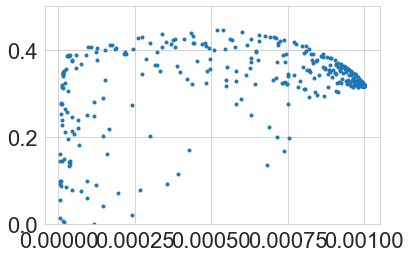

In [231]:
plt.plot(dratave,r2s,'.')
plt.ylim([0, .5])

In [851]:
for i in range(len(drat)):
    drat[i] = drat[19]

In [239]:
#plt.plot((ns),r2s[3],'.')
#plt.ylim((0,.5))
plt.rcParams.update({'font.size': 22})

superscript = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")
mt = a['meantempclass'].unique()
codes = mt.codes
lo = np.zeros(len(codes))
var = dratave


lox = np.zeros(len(codes))
for i in range(len(codes)):
    lox[codes[i]] = mt[codes[i]].left
    fig,ax = plt.subplots(figsize=(10,7))
    plt.plot(var,r2s[codes[i]], '.k')
    plt.ylim([.2, .65])
    lo[codes[i]] = var[np.argmax(r2s[codes[i]])]
    plt.xlabel('E'+'diffusive'.translate(subscript)+' / E'+'total'.translate(subscript))
    #plt.xscale('log')
    plt.title('Range = ' + str(mt[codes[i]]))

fig,ax = plt.subplots(figsize=(10,7))

# for i in range(len(a['meantempclass'].unique())):
#     fig,ax = plt.subplots(figsize=(7,7))
#     plt.hist(ns[r2s[l]>.3], kde=True)

plt.plot(lox,lo,'k.-',linewidth=2,markersize=30)
plt.ylabel('E'+'diffusive'.translate(subscript)+' / E'+'total'.translate(subscript))
plt.xlabel ('Mean Annual Precipitation (mm/yr)')
#plt.yscale('log')


KeyError: 'meantempclass'

## Geologic 

In [199]:
from rasterstats import zonal_stats as zn
import rasterio as rio

In [282]:
geo = zn(a,'/Volumes/Samsung_T5/geo4.tif',stats=['majority','min','max','mean'])
major = [geo[i]['majority'] for i in range(len(geo))]
means = [geo[i]['mean'] for i in range(len(geo))]
mins = [geo[i]['min'] for i in range(len(geo))]

/Users/gr_1/opt/miniconda3/envs/ee/lib/python3.9/site-packages/rasterstats/io.py:302: UserWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn("Setting nodata to -999; specify nodata explicitly")


In [283]:
np.save('geo_major.npy', major)

In [284]:
a['meantempclass'] = major
#a['meantempclass'] 

3553

In [203]:
sns.color_palette("tab10").as_hex()[0]

'#1f77b4'

<ipython-input-1180-84c3268153e3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['geo'][a['geo'] == 146] = 1
<ipython-input-1180-84c3268153e3>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['geo'][a['geo'] == 96] = 0
<ipython-input-1180-84c3268153e3>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['geo'][a['geo'] == 167] = 2
<ipython-input-1180-84c3268153e3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy

<AxesSubplot:>

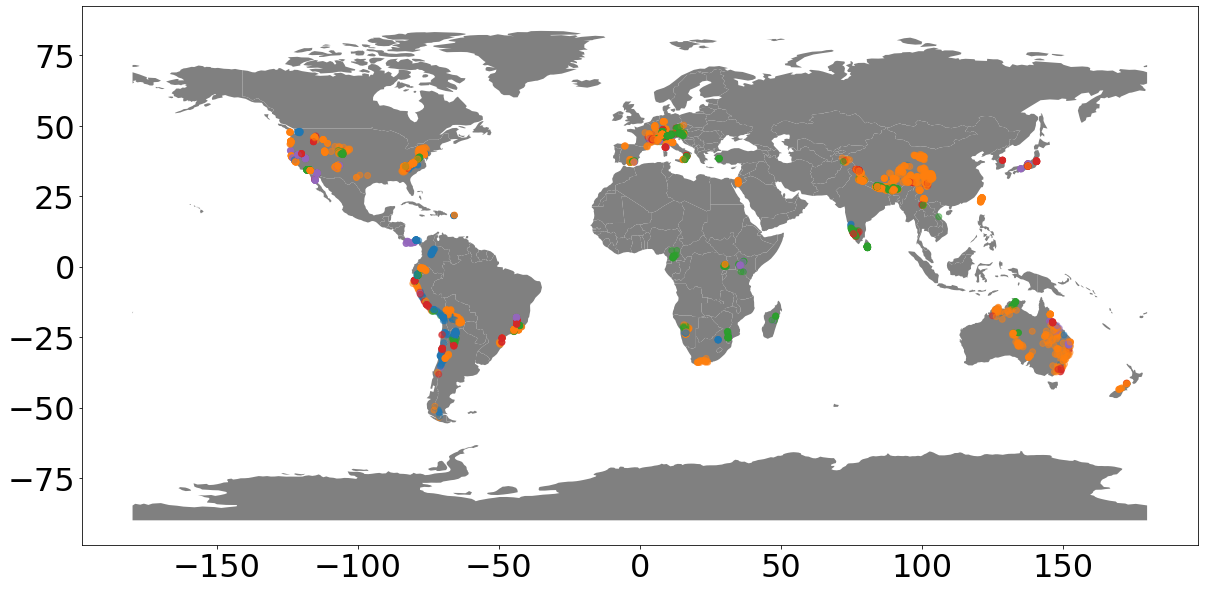

In [1180]:
from matplotlib.colors import ListedColormap

fig,ax = plt.subplots(figsize=(20,10))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax,color='grey')
a['geo'] = major

a['geo'][a['geo'] == 146] = 1
a['geo'][a['geo'] == 96] = 0 
a['geo'][a['geo'] == 167] = 2
a['geo'][a['geo'] == 252] = 3
a['geo'][a['geo'] == 255] = 4

a2 = a.copy()
a2.geometry = a.geometry.centroid


a2.plot('geo',ax = ax,cmap = ListedColormap(sns.color_palette("tab10").as_hex()[:5]),vmin=0, vmax=5,alpha=.5)
#plt.imshow(f)

In [211]:
len(np.logical_and(a['geo']>0 and a['geo'] < 5))

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [1598]:
f = rio.open('
             /geology.tif')
r = f.read()
r2 = r.copy()

In [1599]:


geovals = [146,167,252,255,96,253,176,187]



In [1600]:
ageo = gpd.GeoDataFrame(geometry=a['geometry'])

In [1688]:
ageo['geo'] = a['geo']

In [1689]:
ageo.to_file('geo_test')

In [ ]:
test['Short-term erosion rate (mm kyr^-1)']

In [699]:
test = pd.read_csv('/Users/gr_1/Downloads/Chen_et_al_2021_short-term_erosion_rate_data.csv')

In [705]:
test['log(short-term erosion rate (mm kyr-1))'] = np.log10(test['Short-term erosion rate (mm kyr^-1)'])

In [ ]:
test['log(short-term erosion rate (mm kyr-1))']

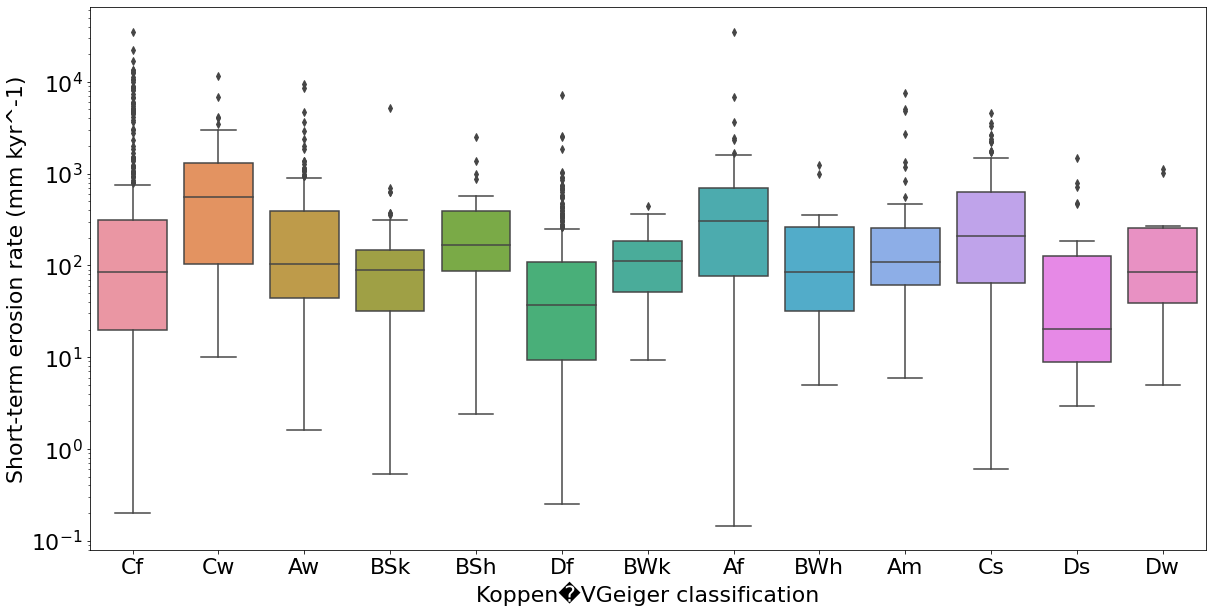

In [706]:
plt.subplots(figsize=(20,10))

sns.boxplot(data=test,x='Koppen�VGeiger classification',y='Short-term erosion rate (mm kyr^-1)')
plt.yscale('log')

AttributeError: module 'seaborn' has no attribute 'qqplot'

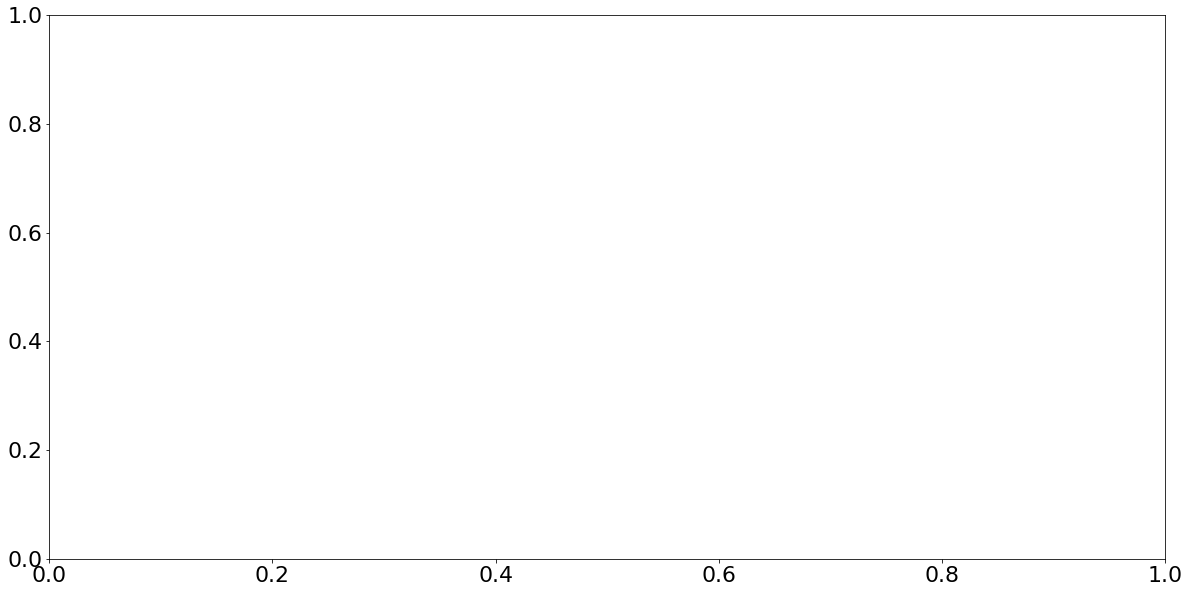

In [774]:
plt.subplots(figsize=(20,10))

sns.qq(data=test,x='Koppen�VGeiger classification',y='log(short-term erosion rate (mm kyr-1))')


In [783]:
from statsmodels.graphics.gofplots import qqplot_2samples

<AxesSubplot:xlabel='log(short-term erosion rate (mm kyr-1))', ylabel='Count'>

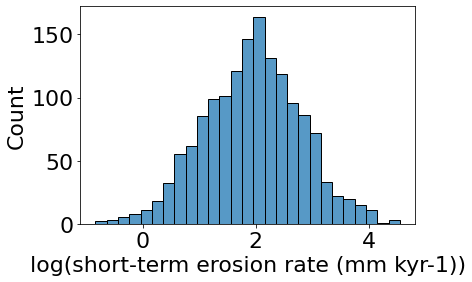

In [708]:
sns.histplot(data=test,x='log(short-term erosion rate (mm kyr-1))')

In [801]:
from scipy.stats import kruskal as ks

In [818]:
g1 = []
g2 = []
for i,g in test.groupby('Koppen�VGeiger classification'):
    g1.append(g['Short-term erosion rate (mm kyr^-1)'])
    g2.append(g['log(short-term erosion rate (mm kyr-1))'])

In [819]:
p = np.zeros((len(g1),len(g1)))
for i in range(len(g1)):
    for j in range(i,len(g1)):
        p[i,j] = ks(g1[j],g1[i]).pvalue

In [815]:
g1 = []
for i in range(10):
    subset = test.sample(10)
    g1.append(subset['Short-term erosion rate (mm kyr^-1)'])

([<matplotlib.axis.YTick at 0x1b5a0e580>,
 [Text(0, 0, 'Cf'),
  Text(0, 1, 'Cw'),
  Text(0, 2, 'Aw'),
  Text(0, 3, 'BSk'),
  Text(0, 4, 'BSh'),
  Text(0, 5, 'Df'),
  Text(0, 6, 'BWk'),
  Text(0, 7, 'Af'),
  Text(0, 8, 'BWh'),
  Text(0, 9, 'Am'),
  Text(0, 10, 'Cs'),
  Text(0, 11, 'Ds'),
  Text(0, 12, 'Dw')])

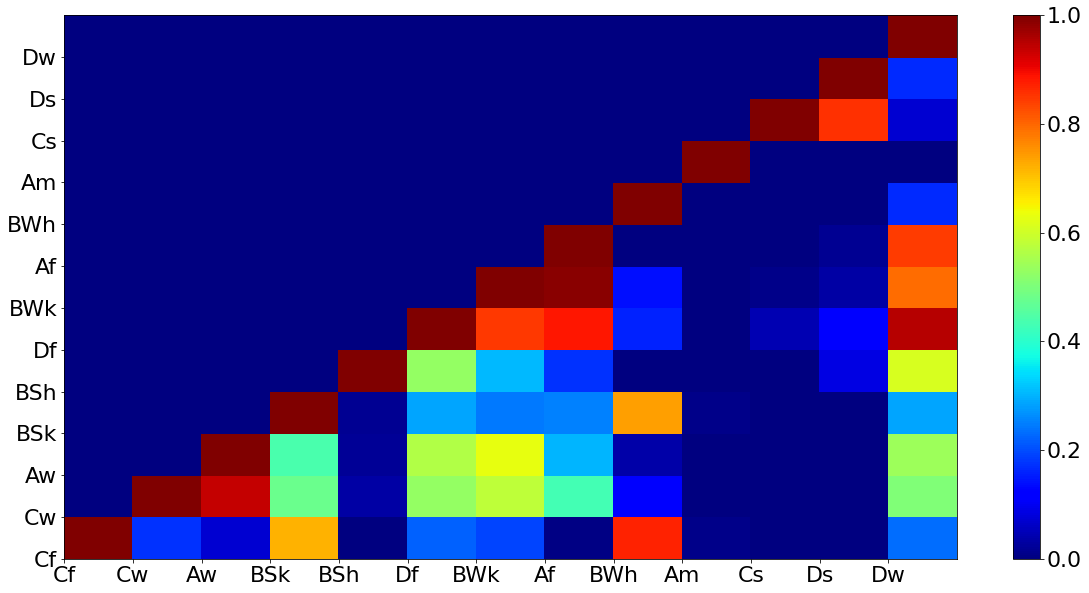

In [773]:
plt.subplots(figsize=(20,10))
plt.pcolor(p,vmin=0,vmax=1,cmap='jet')
plt.colorbar()
plt.xticks(ticks=list(range(len(g2))),labels=test['Koppen�VGeiger classification'].unique())
plt.yticks(ticks=list(range(len(g2))),labels=test['Koppen�VGeiger classification'].unique())